In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [2]:
%time
train_df = pd.read_csv('playground-series-s3e26/train.csv', index_col=[0])

CPU times: total: 0 ns
Wall time: 0 ns


In [3]:
%time
!pip install fasteda
from fasteda import fast_eda

CPU times: total: 0 ns
Wall time: 0 ns
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4739 sha256=4f27e5248e852da9ca4e931bba48deafb5867045c2830ea1e58d8f299c5233fe
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\1b\7c\6a\e69ca45b2d5bbe3434f6c36398d1f73b4ef1408864458b31ff
Successfully built fasteda



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%time
Features = train_df.drop(['Status'], axis=1)
Target= train_df.Status

CPU times: total: 0 ns
Wall time: 0 ns


In [5]:
%time

from sklearn.preprocessing import StandardScaler

def preprocess(df):

    df["Drug"] = df["Drug"].map({"Placebo": 0, "D-penicillamine": 1})
    df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
    
    for col in ["Ascites", "Hepatomegaly", "Spiders"]:
        df[col] = df[col].map({"N": 0, "Y": 1})
        
    df["Edema"] = df["Edema"].map({"N": 0, "S": 1, "Y": 1})
        
    return df

def scale_data(df):    
    colums = df.columns
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    df[colums] = scaled_data
    
    return df

CPU times: total: 0 ns
Wall time: 0 ns


CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
DataFrame Head:


N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema   
id                                                                    
0      999     1  21532    0        0             0        0      0  \
1     2574     0  19237    1        0             0        0      0   
2     3428     0  13727    1        0             1        1      1   

    Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides   
id                                                                             
0         2.3        316.0     3.35   172.0    1601.0  179.80           63.0  \
1         0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2         3.3        299.0     3.55   131.0    1029.0  119.35           50.0   

    Platelets  Prothrombin  Stage  Status  
id                                         
0       394.0          9.7    3.0       0  
1       361.0         11.0    3.0       2  
2       199.0         11.7    4.0       0

DataFrame Tail:


N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema   
id                                                                      
7902    1576     1  25873    1        0             0        1      1  \
7903    3584     1  22960    0        0             1        0      0   
7904    1978     1  19237    1        0             0        0      0   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  Tryglicerides   
id                                                                              
7902        2.0        225.0     3.19    51.0     933.0  69.75           62.0  \
7903        0.7        248.0     2.75    32.0    1003.0  57.35          118.0   
7904        0.7        256.0     3.23    22.0     645.0  74.40           85.0   

      Platelets  Prothrombin  Stage  Status  
id                                           
7902      200.0         12.7    2.0       0  
7903      221.0         10.6    4.0       0  
7904      336.0         10.3    3.0       2

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(7905, 19)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   int64  
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   int64  
 4   Ascites        7905 non-null   int64  
 5   Hepatomegaly   7905 non-null   int64  
 6   Spiders        7905 non-null   int64  
 7   Edema          7905 non-null   int64  
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-n

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



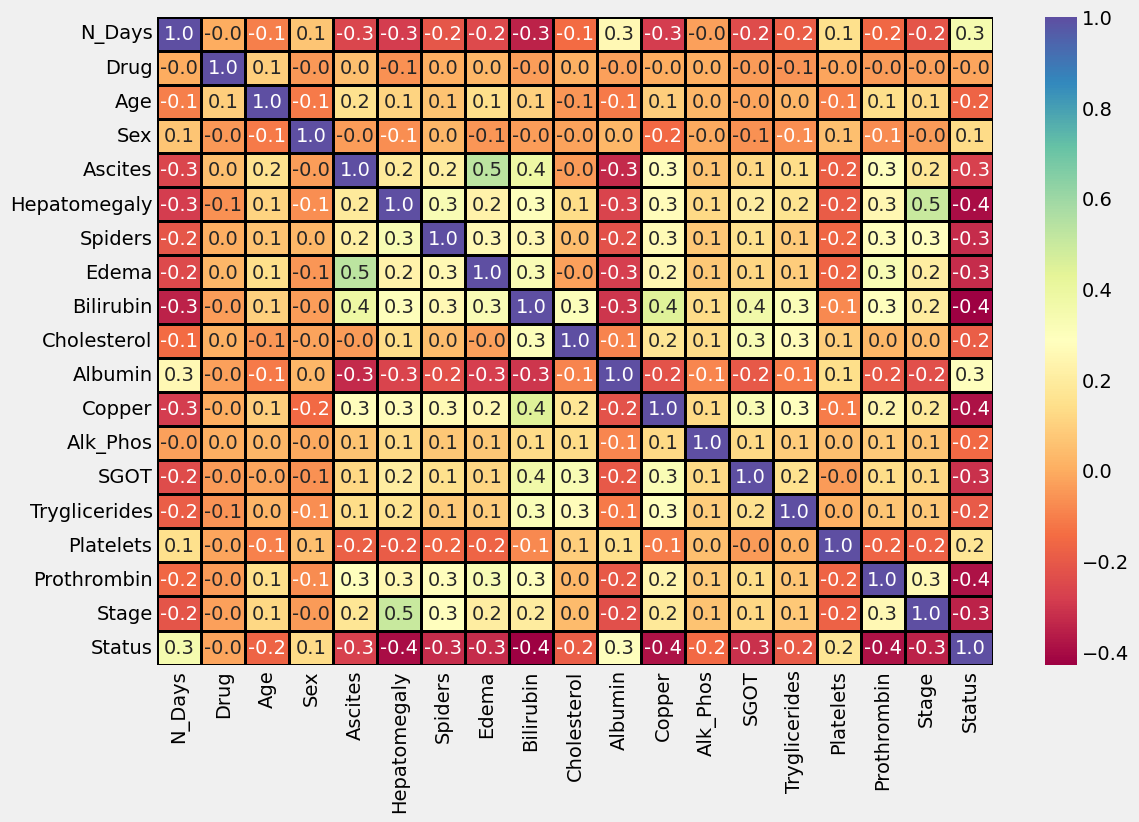

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



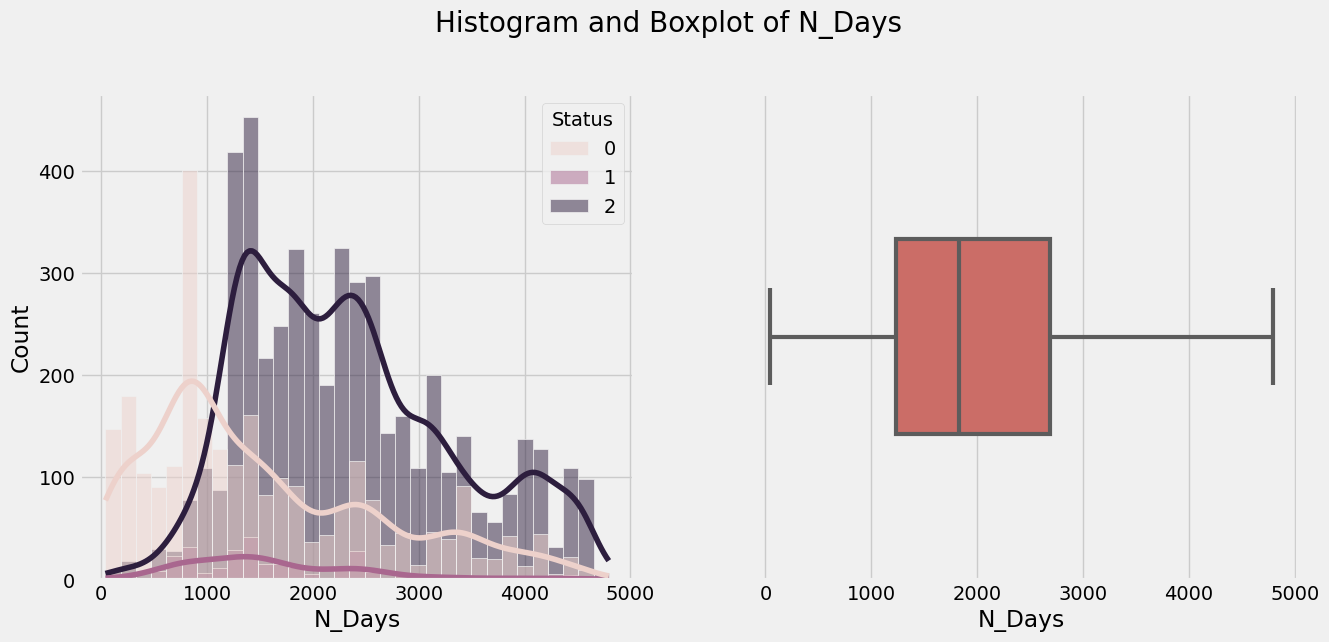

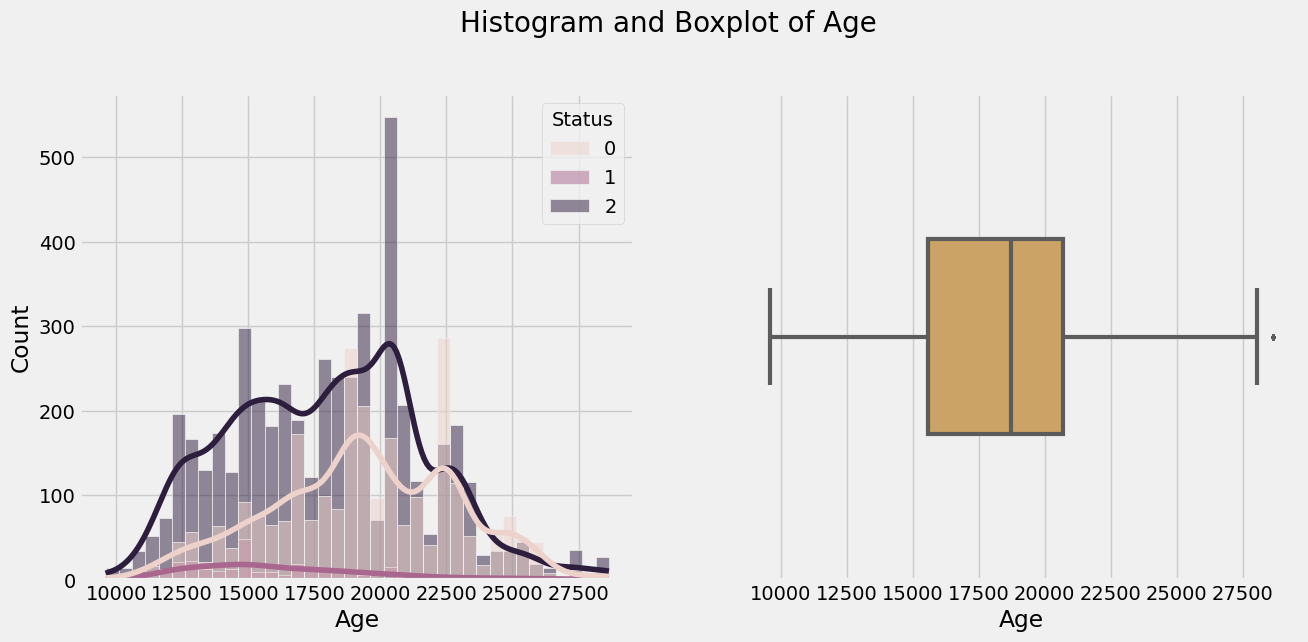

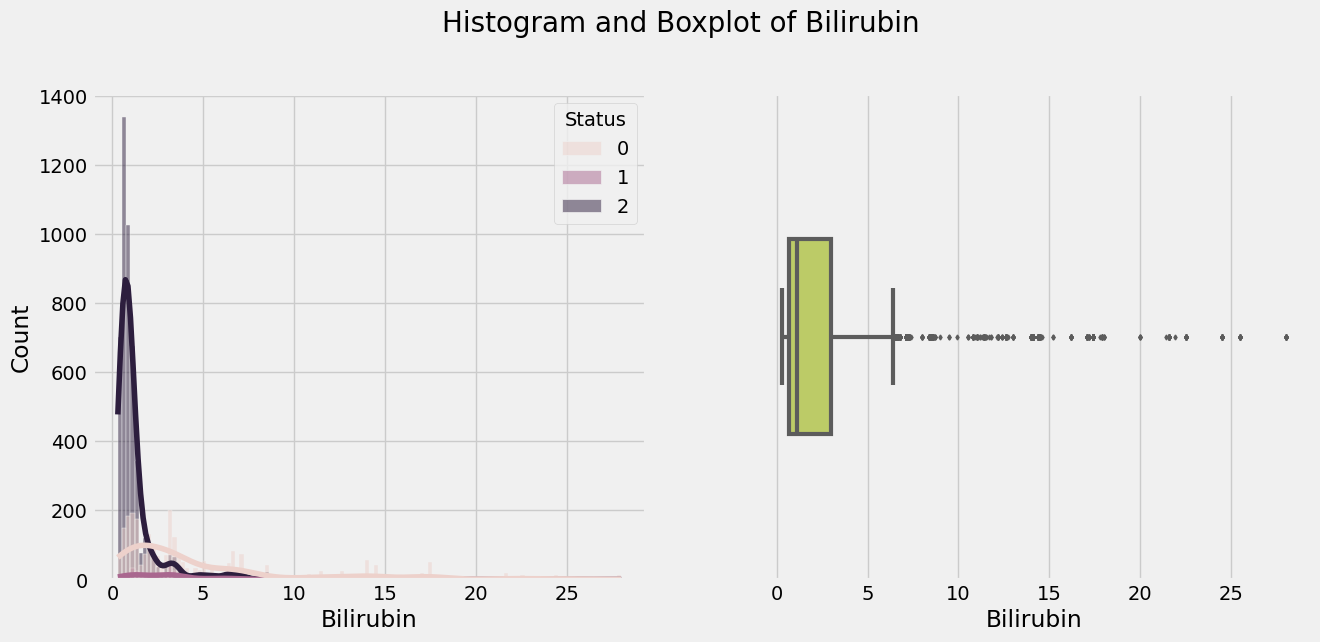

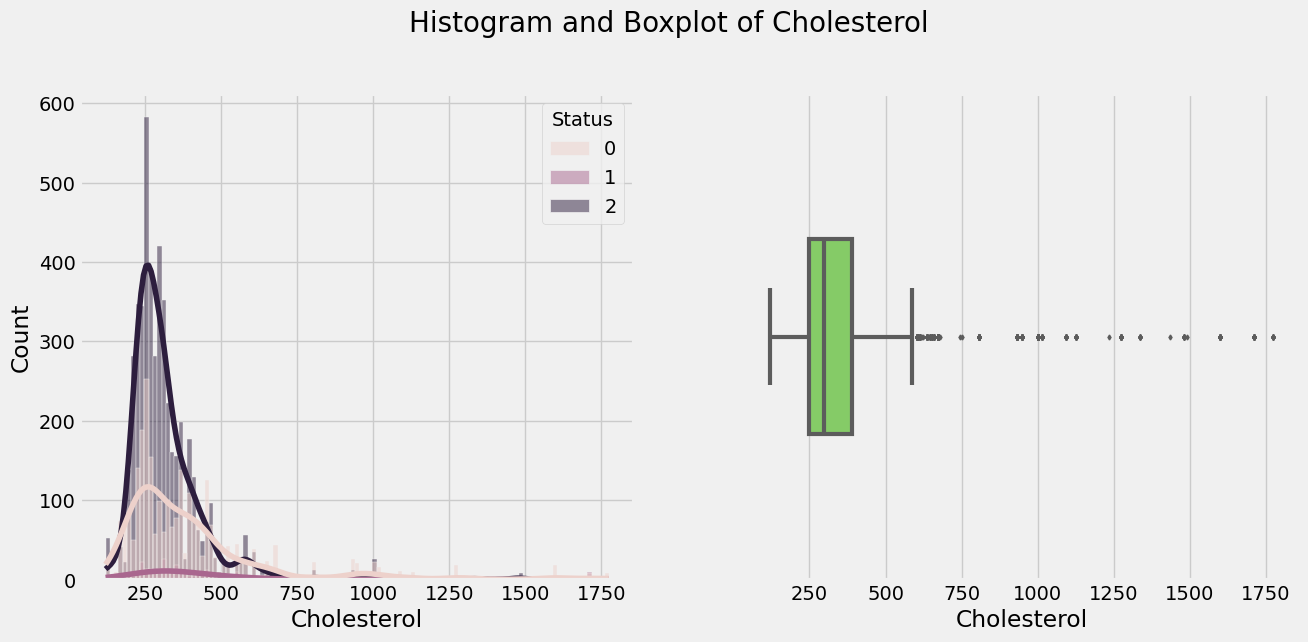

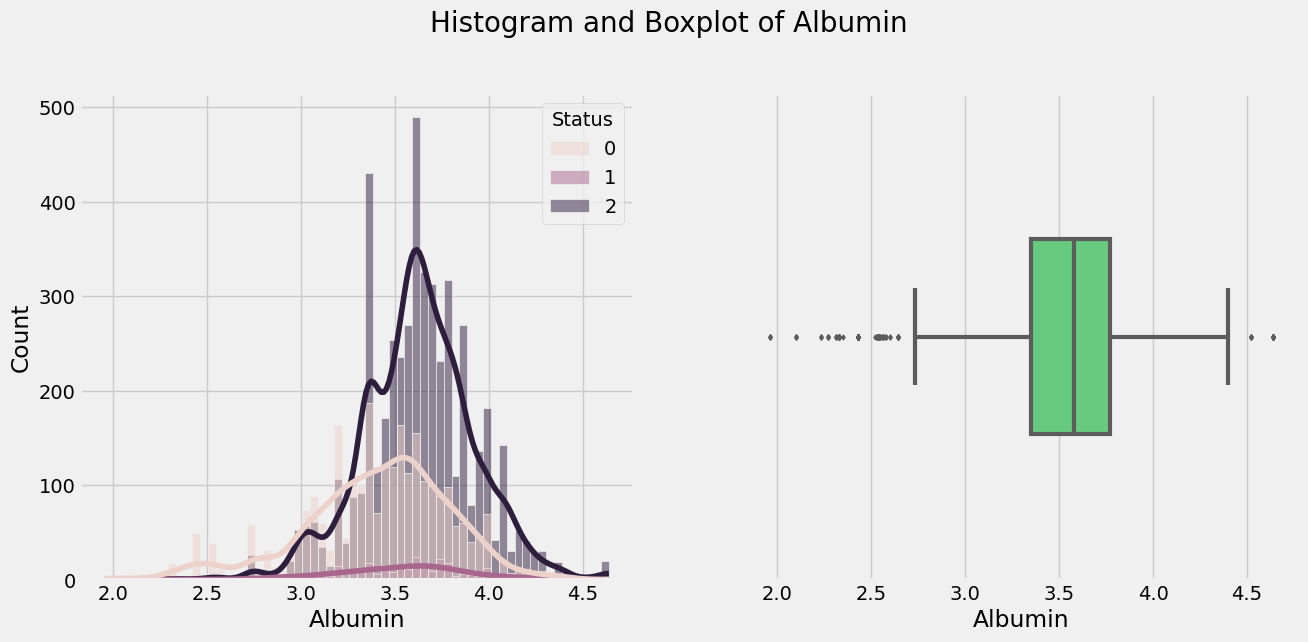

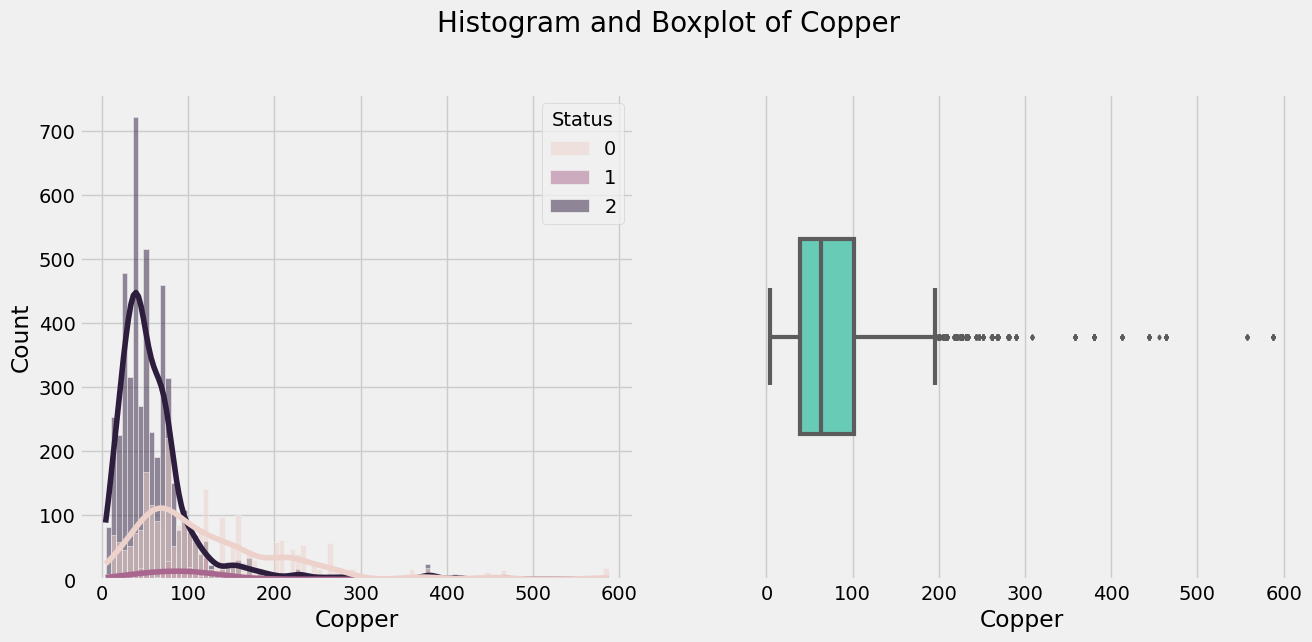

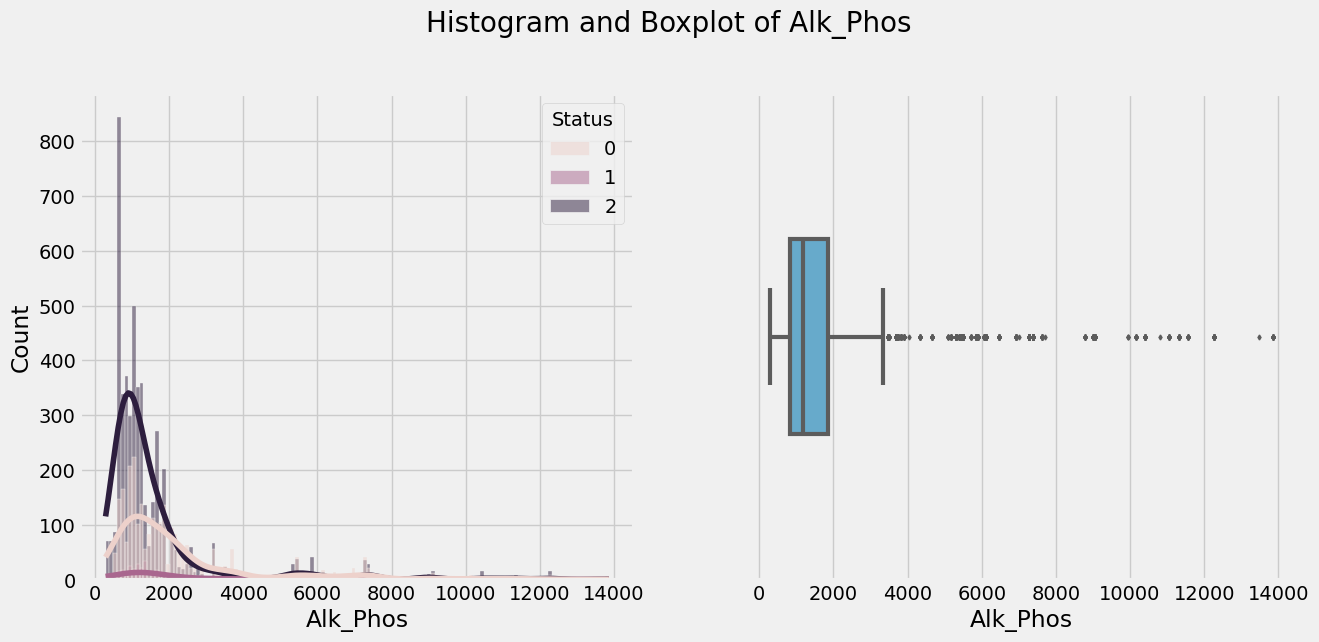

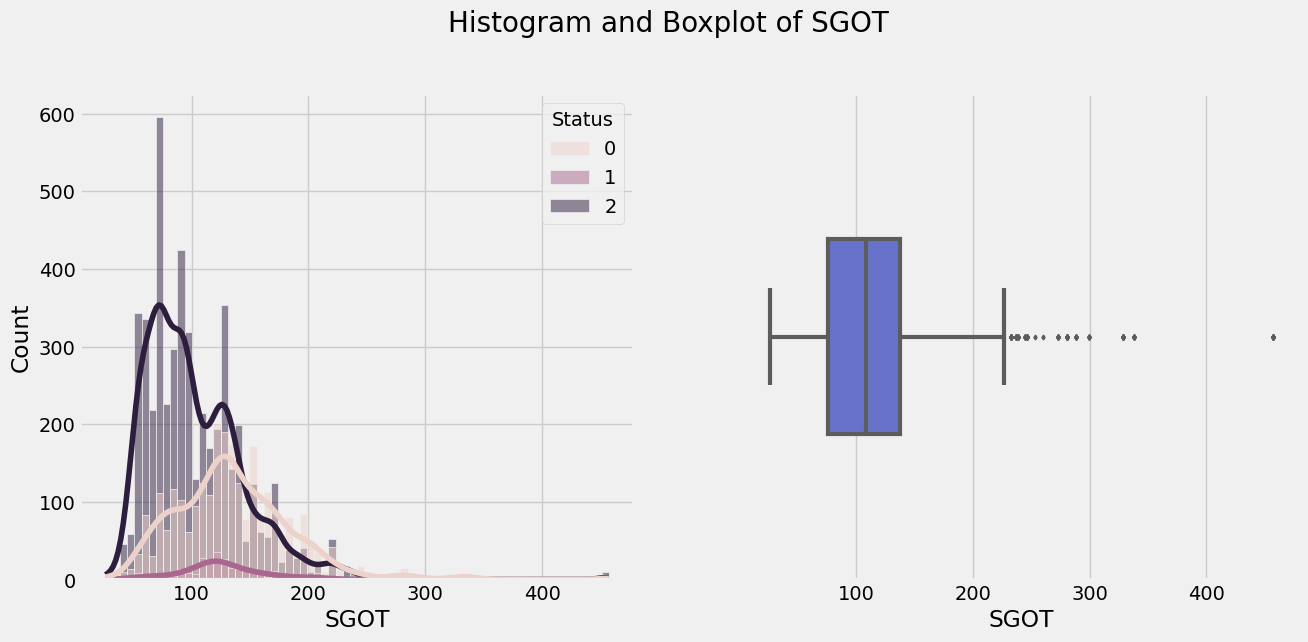

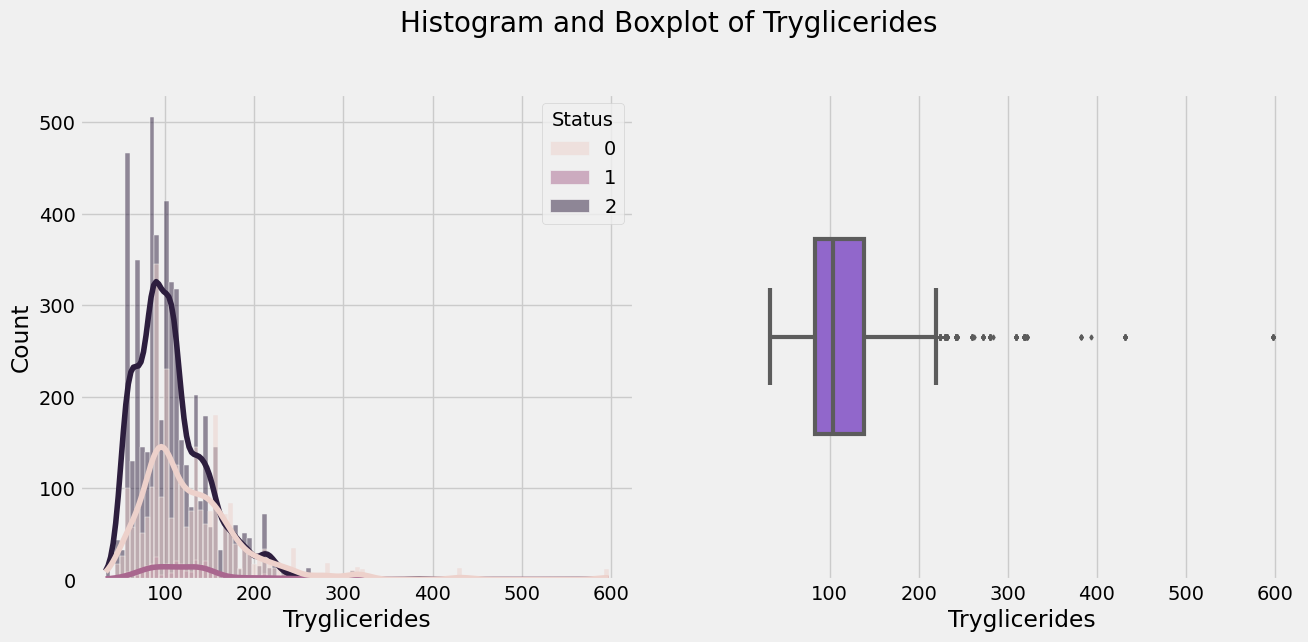

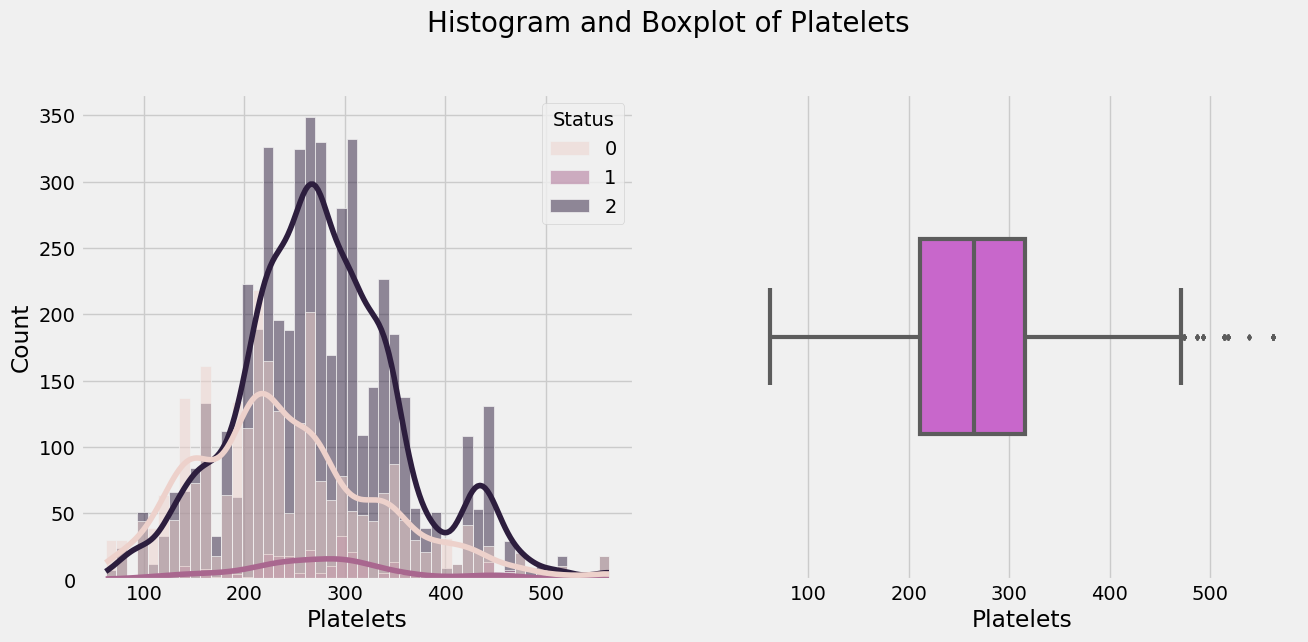

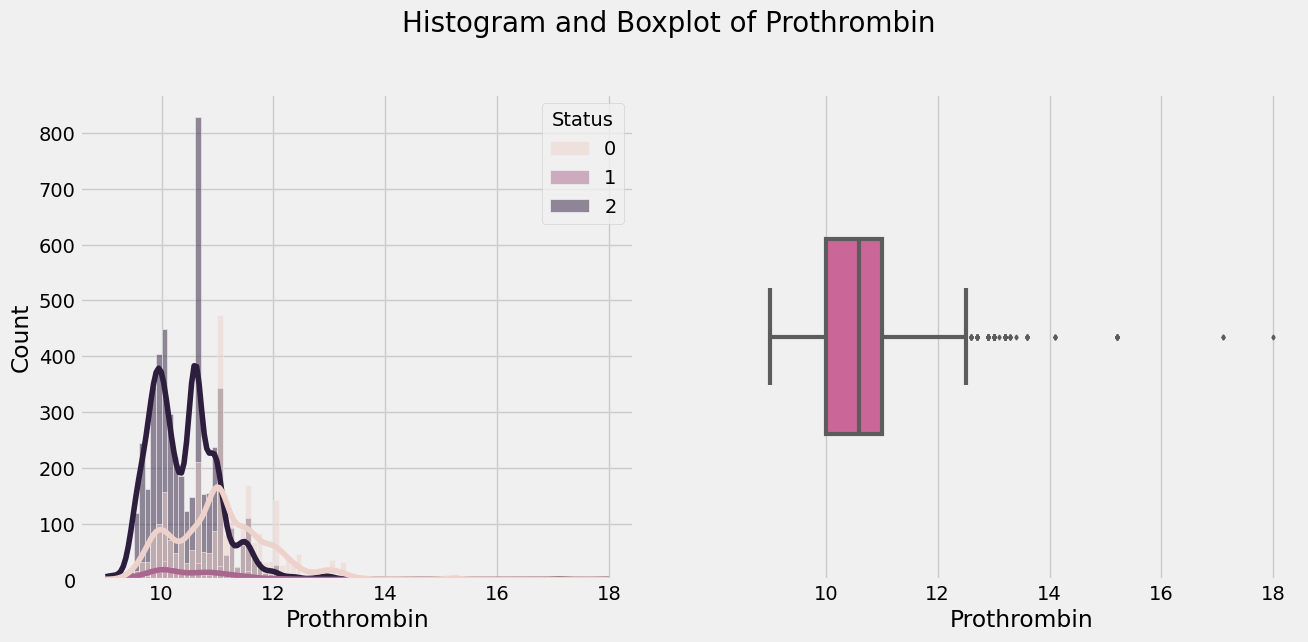

----------------------------------------------------------------------------------------------------
Countplot(s):



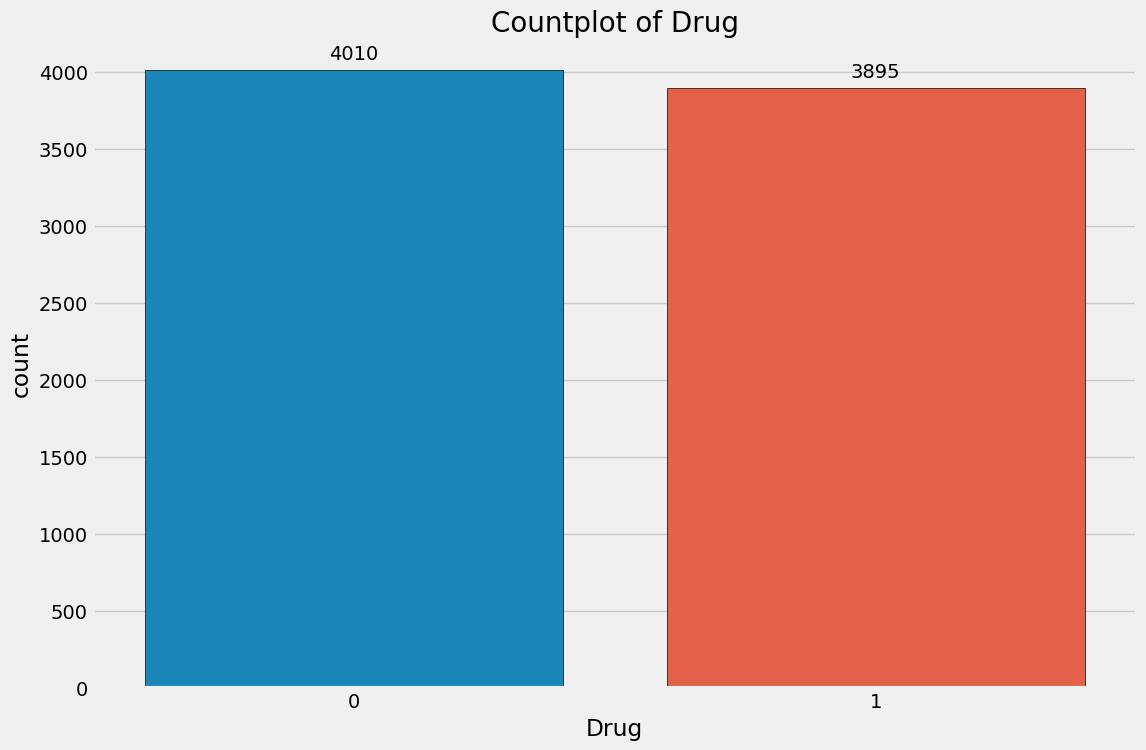

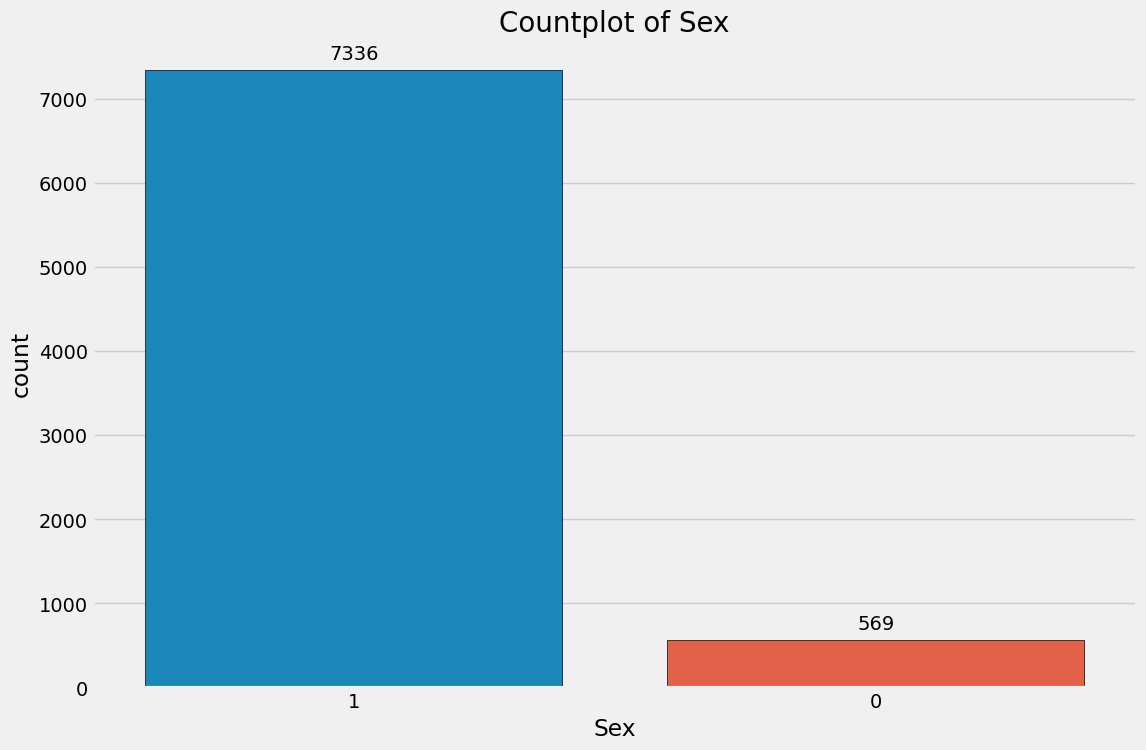

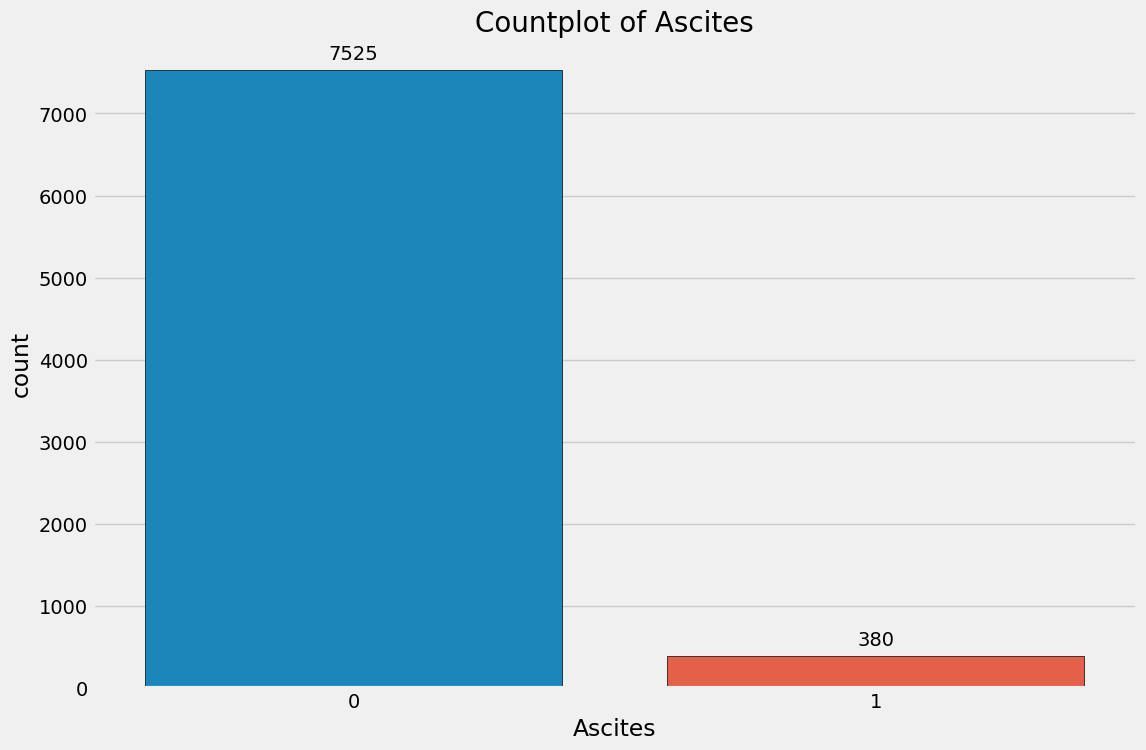

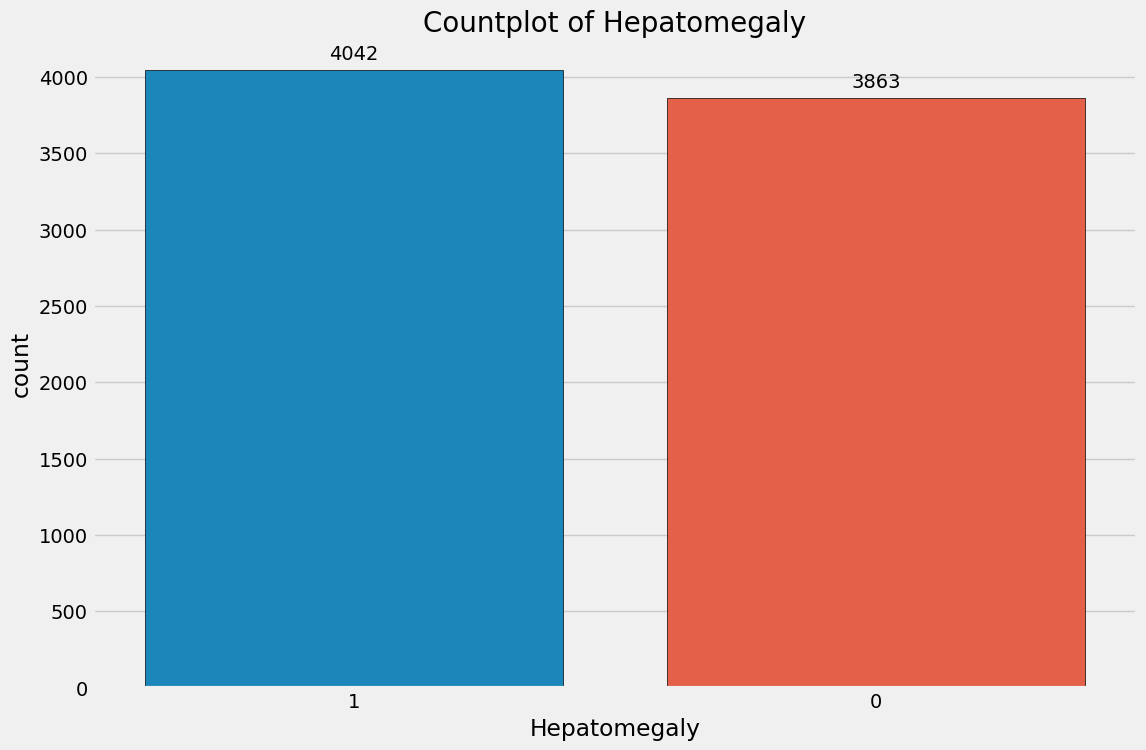

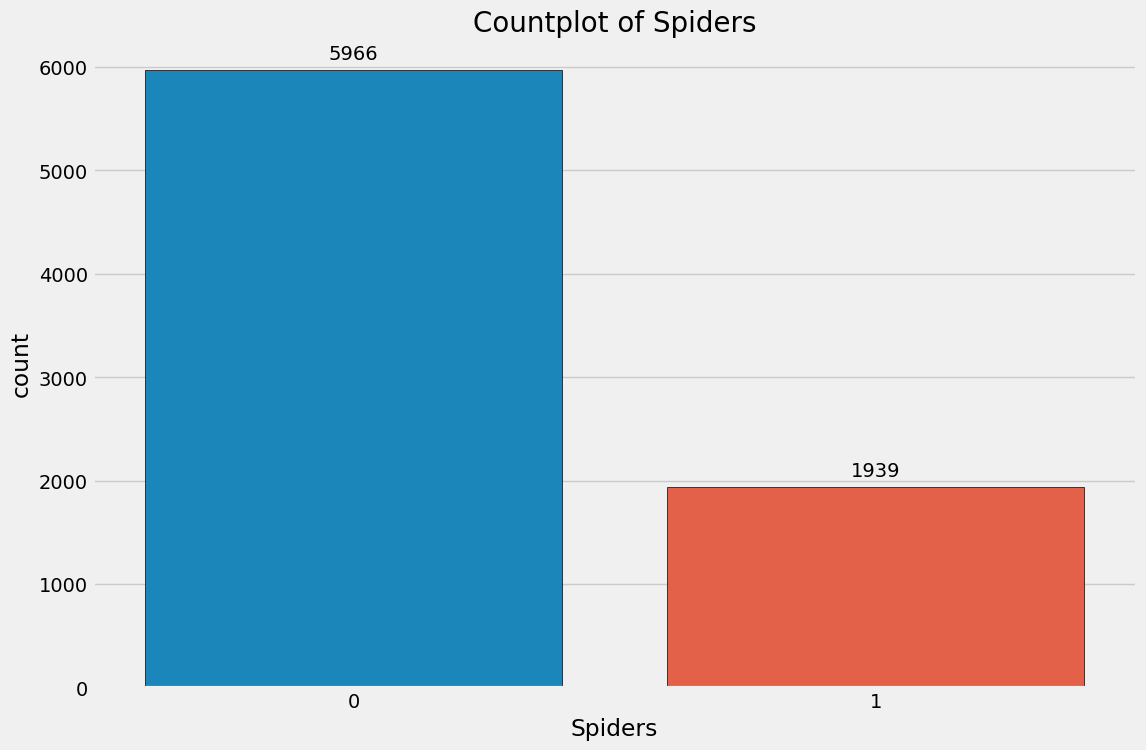

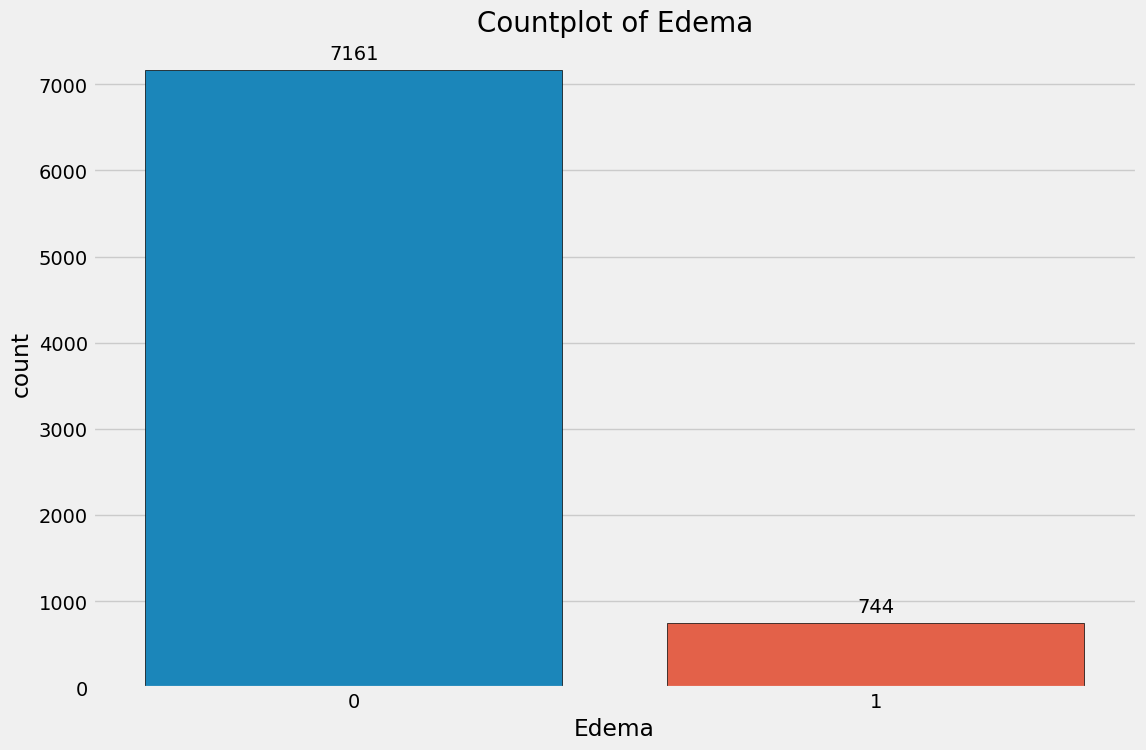

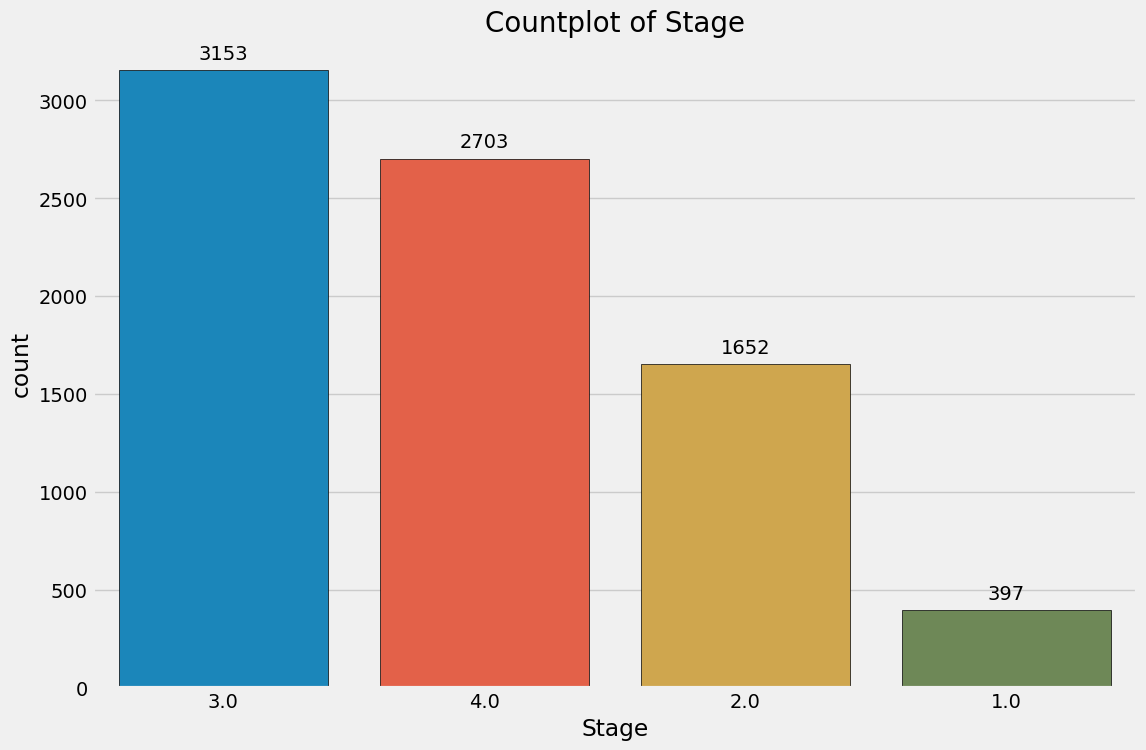

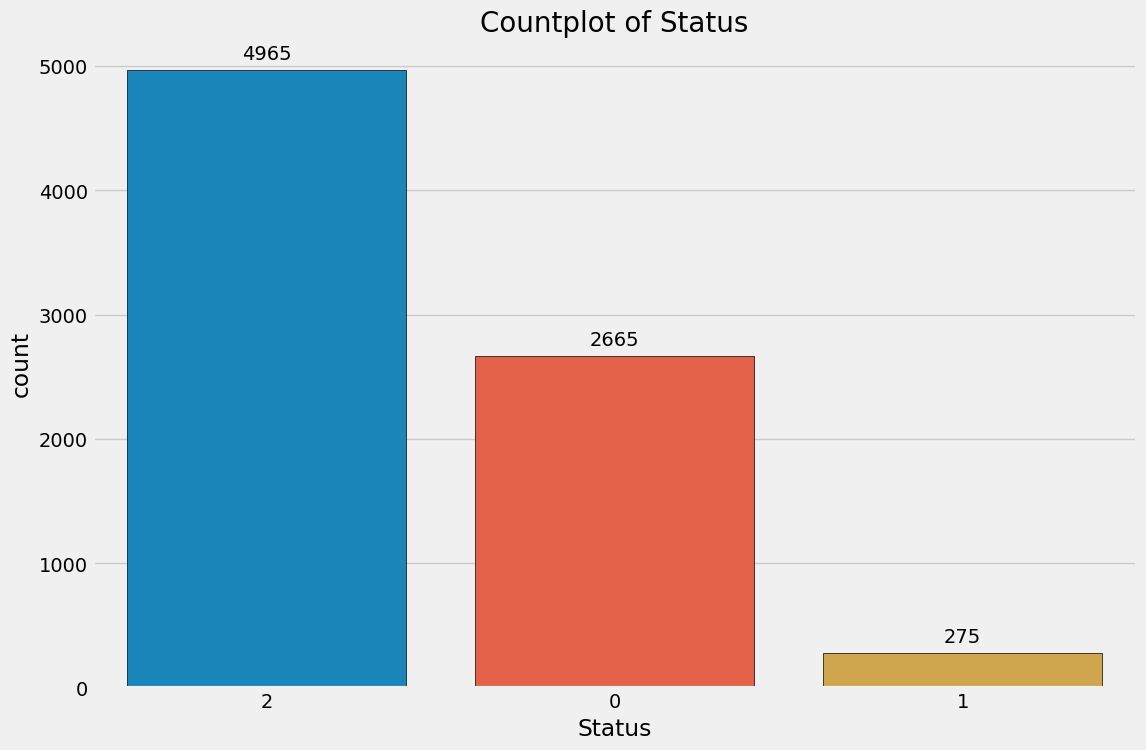

In [6]:
%time
fast_eda_train = preprocess(Features)
# fast_eda_train = scale_data(Features)

fast_eda_train['Status'] = train_df['Status'].map({"D": 0, "CL": 1, "C": 2})

%time
fast_eda(fast_eda_train, target="Status")

CPU times: total: 0 ns
Wall time: 0 ns


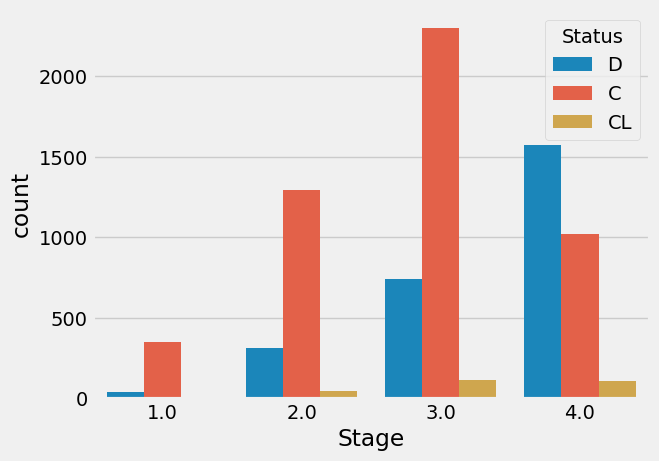

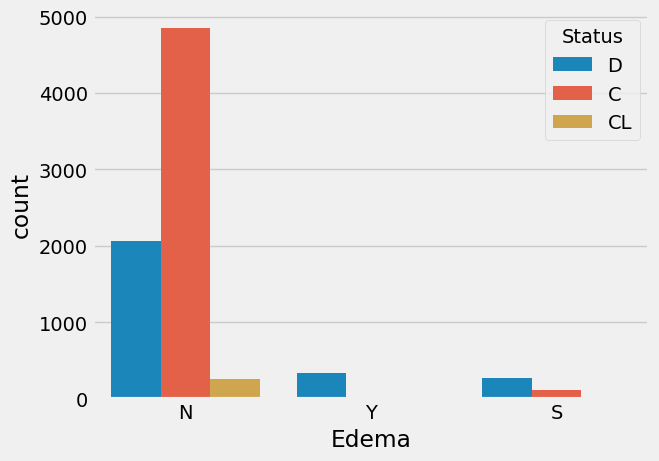

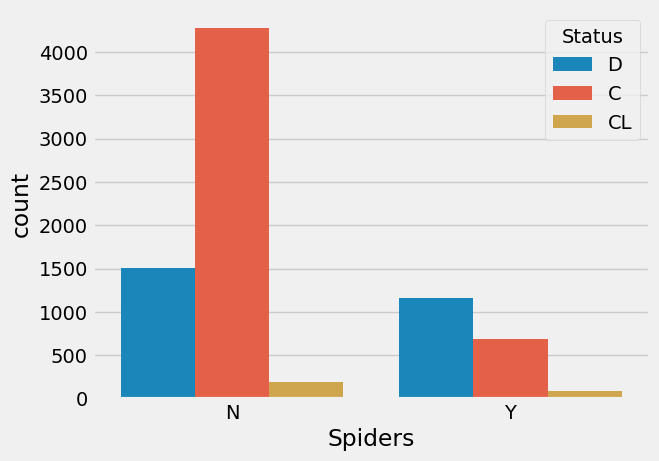

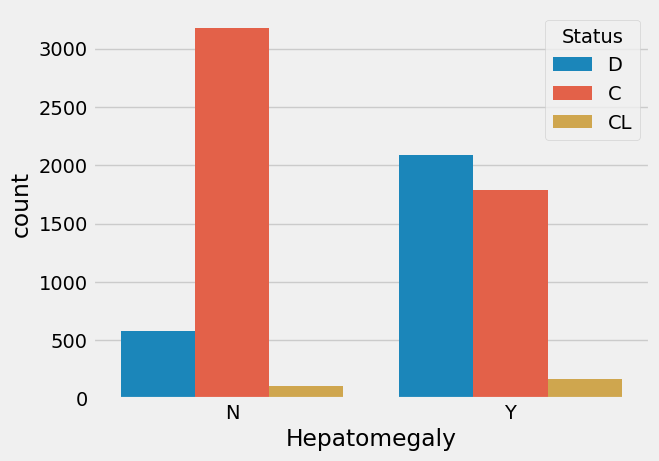

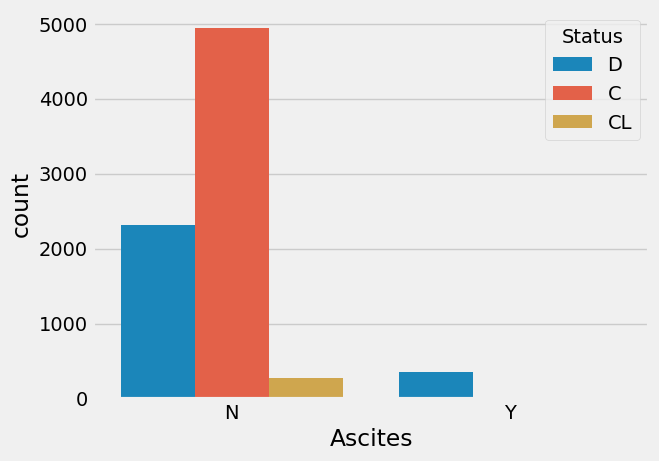

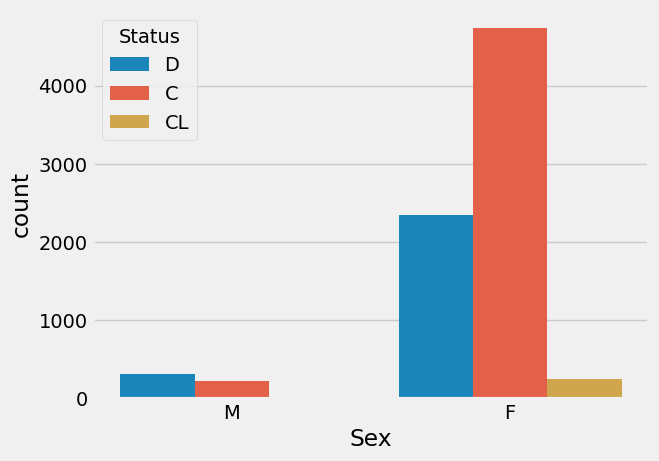

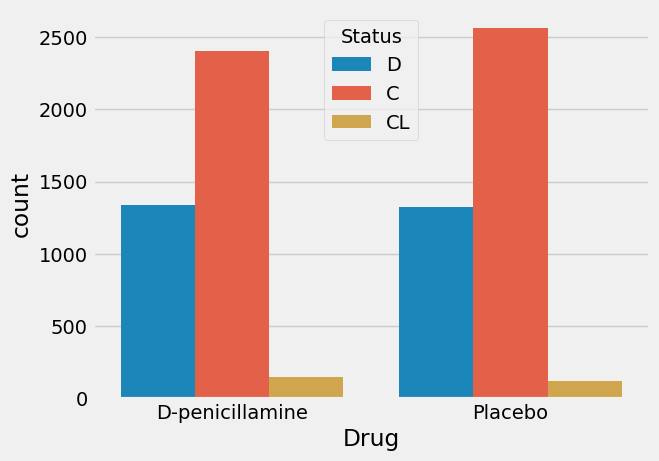

In [7]:
%time
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['Stage', 'Edema', 'Spiders', 'Hepatomegaly', 'Ascites', 'Sex', 'Drug'] :
    sns.countplot(data= train_df, x=col, hue='Status')
    plt.show()
    

CPU times: total: 0 ns
Wall time: 0 ns


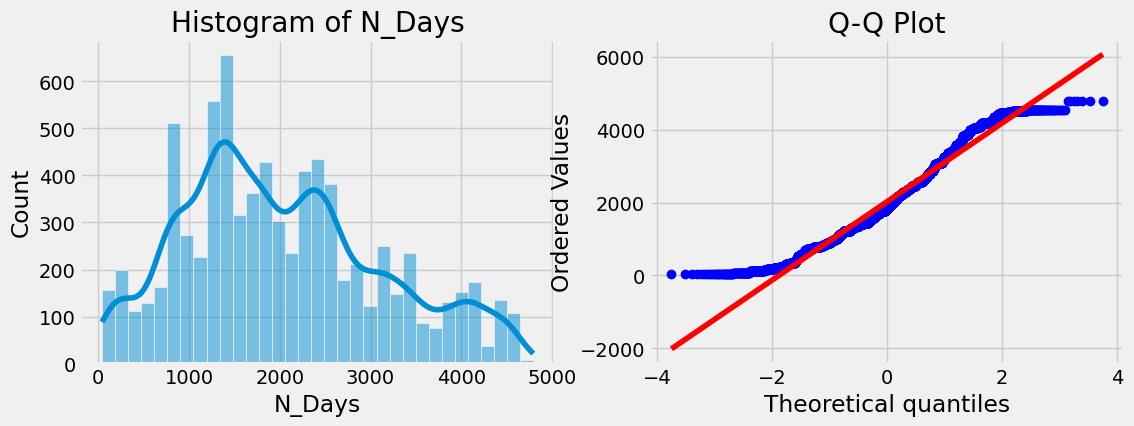

Shapiro-Wilk test statistic: 0.969781219959259
p-value: 9.066098944232658e-38
Normality test statistic: 388.62656156496746
p-value: 4.0814492023788646e-85


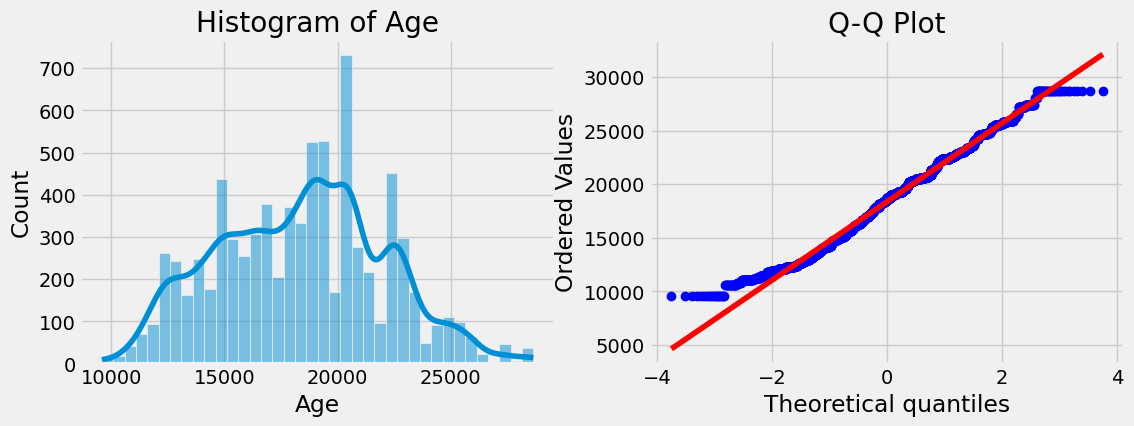

Shapiro-Wilk test statistic: 0.9905115365982056
p-value: 1.3514632499614297e-22
Normality test statistic: 158.12232037926503
p-value: 4.6150286001863296e-35


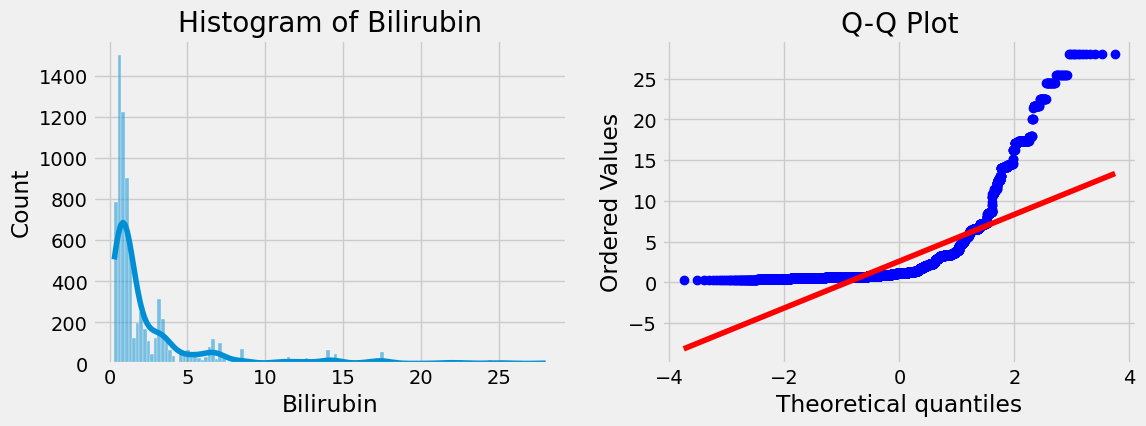

Shapiro-Wilk test statistic: 0.5664154291152954
p-value: 0.0
Normality test statistic: 5531.942075317846
p-value: 0.0


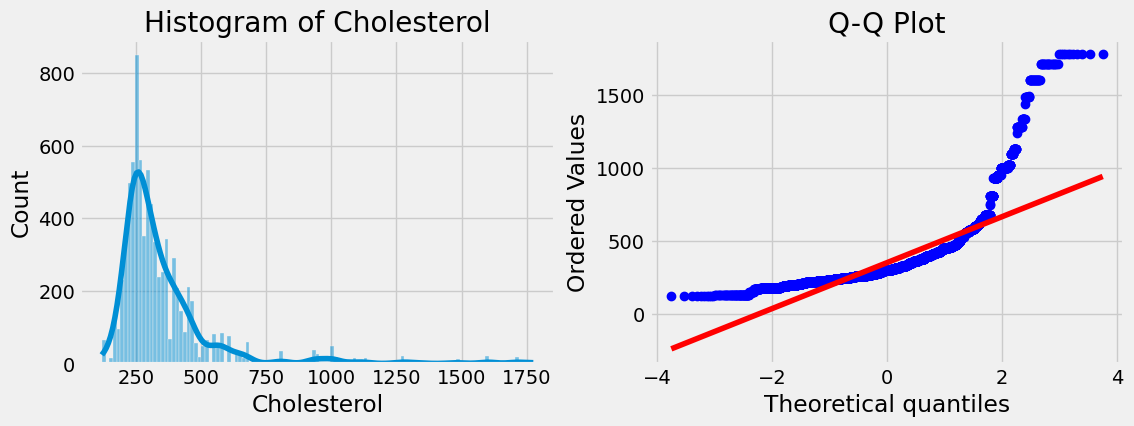

Shapiro-Wilk test statistic: 0.6460719108581543
p-value: 0.0
Normality test statistic: 6165.2438181181915
p-value: 0.0


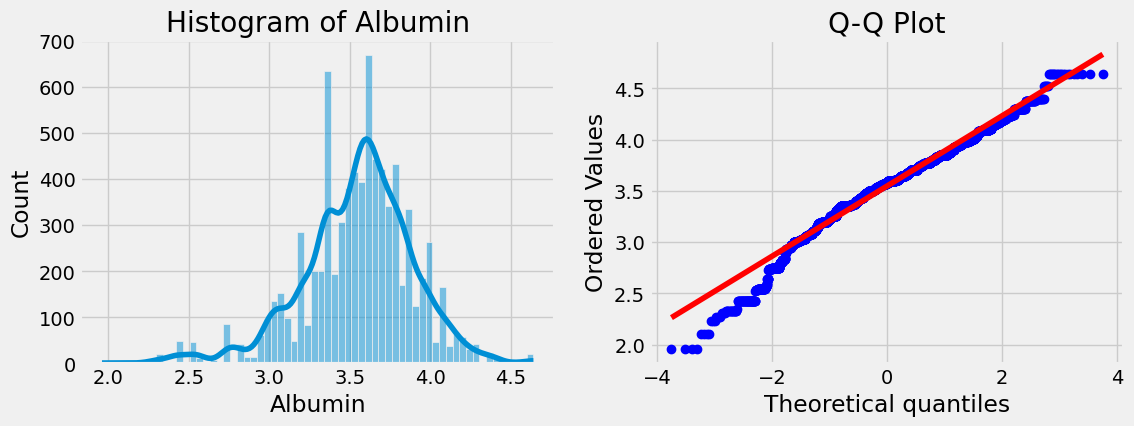

Shapiro-Wilk test statistic: 0.976367712020874
p-value: 3.3104258132532837e-34
Normality test statistic: 590.5804869061863
p-value: 5.715795845680688e-129


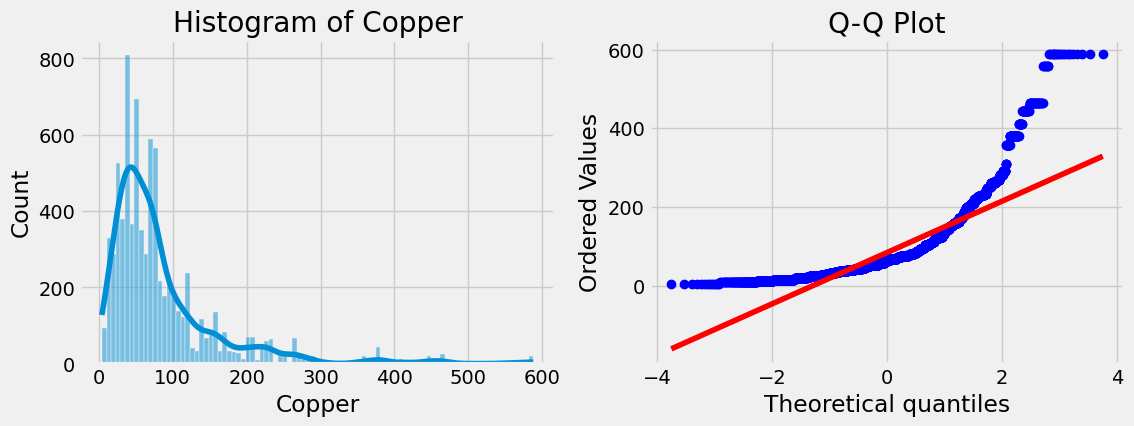

Shapiro-Wilk test statistic: 0.7390970587730408
p-value: 0.0
Normality test statistic: 4620.144169646806
p-value: 0.0


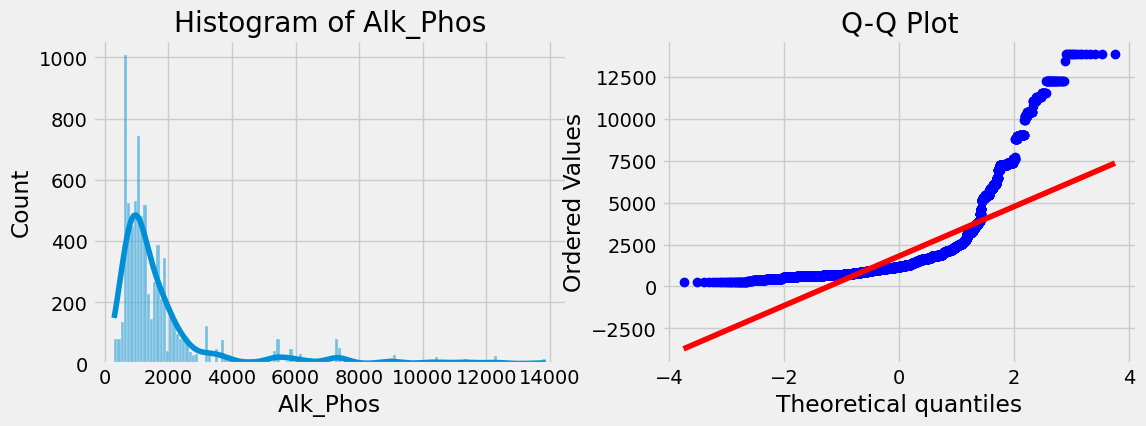

Shapiro-Wilk test statistic: 0.6027835011482239
p-value: 0.0
Normality test statistic: 5288.802834560961
p-value: 0.0


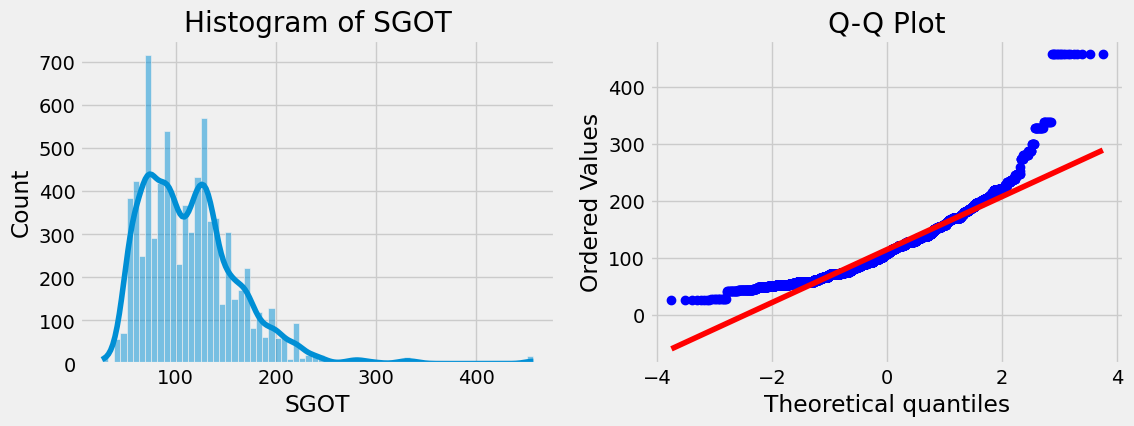

Shapiro-Wilk test statistic: 0.9071136116981506
p-value: 0.0
Normality test statistic: 2674.970128476928
p-value: 0.0


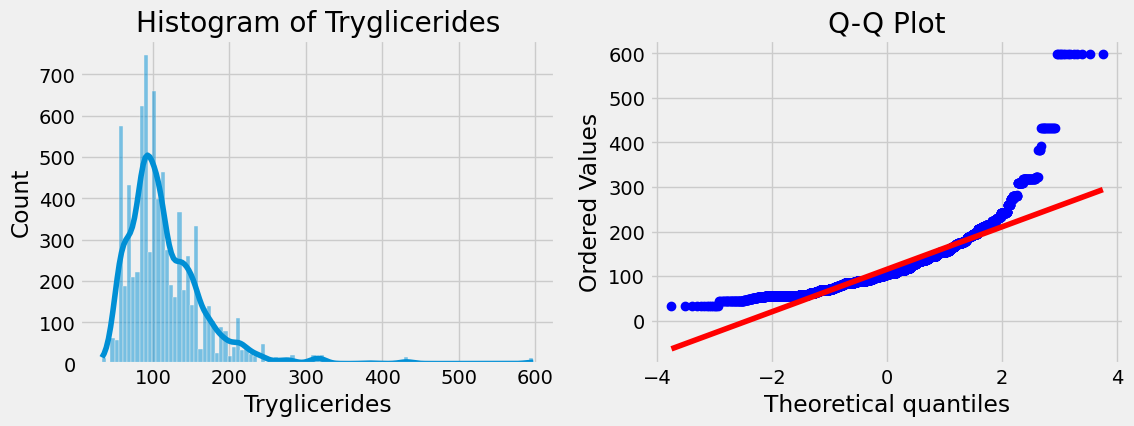

Shapiro-Wilk test statistic: 0.8227184414863586
p-value: 0.0
Normality test statistic: 4846.665687332776
p-value: 0.0


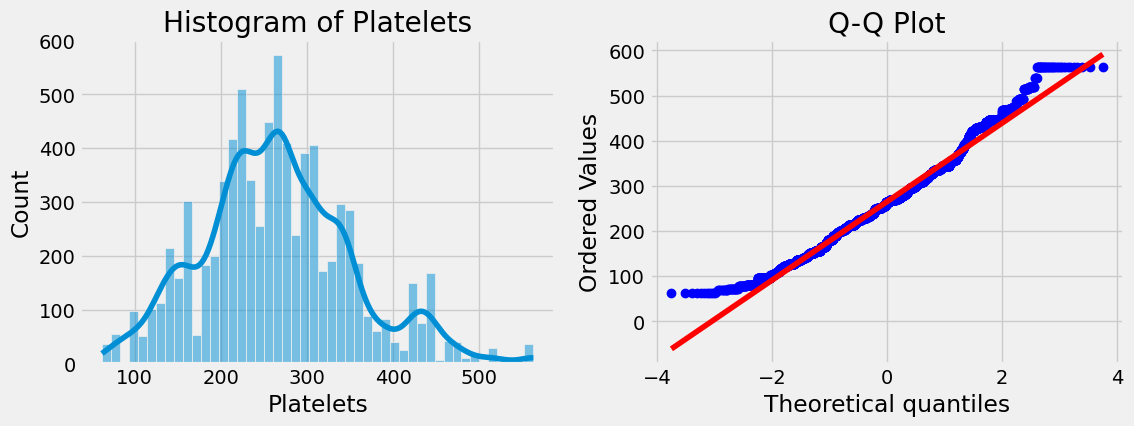

Shapiro-Wilk test statistic: 0.9855724573135376
p-value: 1.2998008750032124e-27
Normality test statistic: 241.8866019284966
p-value: 2.985326032314718e-53


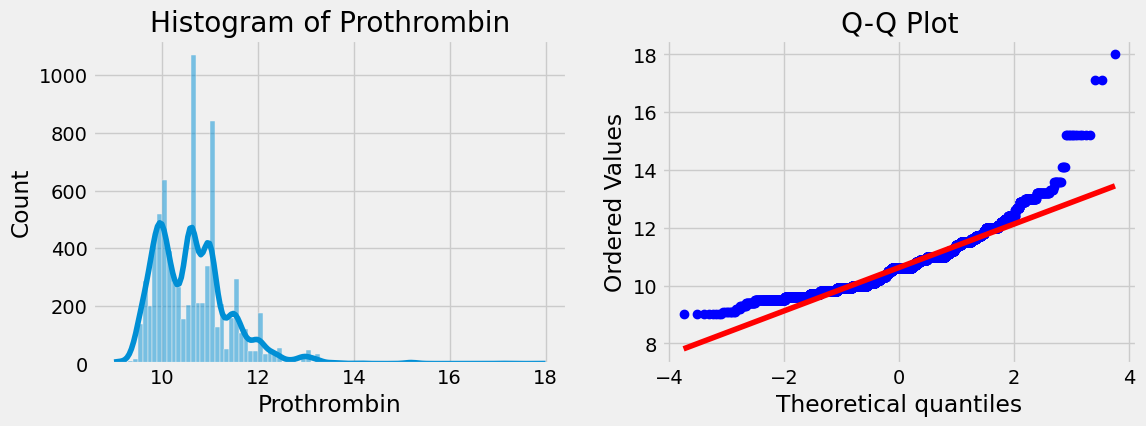

Shapiro-Wilk test statistic: 0.9228744506835938
p-value: 0.0
Normality test statistic: 2125.435372703789
p-value: 0.0


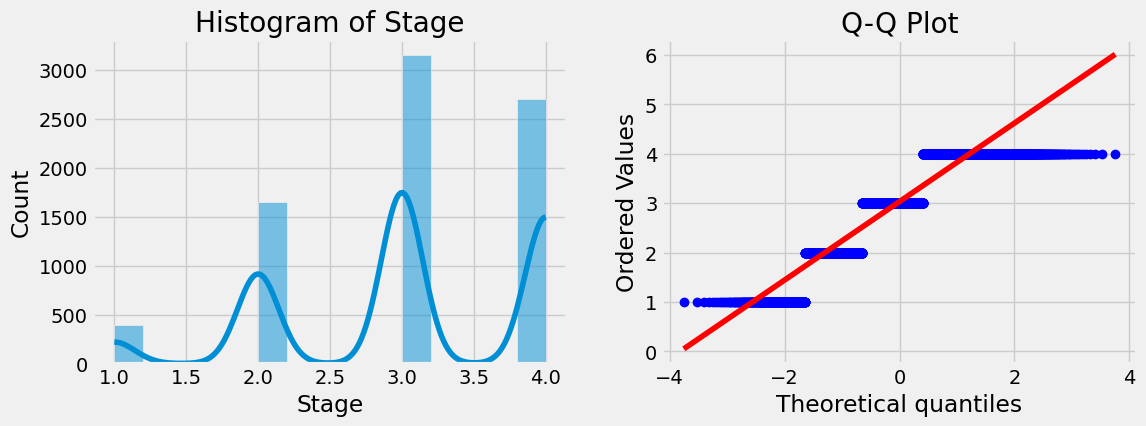

Shapiro-Wilk test statistic: 0.8409018516540527
p-value: 0.0
Normality test statistic: 497.41381198173747
p-value: 9.726646153690284e-109


In [8]:
%time
from scipy.stats import shapiro, normaltest
from scipy import stats

for col in train_df.select_dtypes(np.number).columns:

    data = train_df[col]

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist='norm', plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    shapiro_test_statistic, shapiro_p_value = shapiro(data)
    print(f'Shapiro-Wilk test statistic: {shapiro_test_statistic}')
    print(f'p-value: {shapiro_p_value}')

    normaltest_statistic, normaltest_p_value = normaltest(data)
    print(f'Normality test statistic: {normaltest_statistic}')
    print(f'p-value: {normaltest_p_value}')


# Shapiro-Wilk Test:

1. The test is based on the comparison of the observed sample values to what would be expected under the assumption of a normal distribution. The test statistic is calculated in a way that makes it sensitive to departures from normality across the range of possible distribution shapes.
2. A low p-value indicates that the sample data deviates significantly from a normal distribution.

# Normality Test:

1. The test statistic here (388.63) is likely a measure of how much the observed data deviates from a perfectly normal distribution, and the extremely low p-value indicates that the deviation is statistically significant.
2. This particular test might be more sensitive to specific types of non-normality.

So we try to convert this in normal distribution using Power Transformer by defualt power transfromer takes the argument yeo-jhonson method which is advance version of box-cox method

In [9]:
%time
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

CPU times: total: 0 ns
Wall time: 0 ns


In [10]:
%time
num_col = train_df.select_dtypes(np.number).columns

trf1 = ColumnTransformer(
    transformers=[
        ("Skewness_Test", PowerTransformer(), num_col)
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
).set_output(transform="pandas")

CPU times: total: 0 ns
Wall time: 0 ns


In [11]:
num_col

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [12]:
%time
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
%time
from sklearn.model_selection import KFold, GridSearchCV

CPU times: total: 0 ns
Wall time: 0 ns


In [14]:
%time
df = preprocess(train_df)
df = trf1.fit_transform(df)
df

CPU times: total: 0 ns
Wall time: 0 ns


N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper   
id                                                                     
0    -0.914653  0.863633   0.717416     0.124061 -0.635276  1.316134  \
1     0.569410  0.258459  -0.484236     0.503971 -0.095100  0.021285   
2     1.218335 -1.277713   1.071075    -0.036707 -0.065494  0.966108   
3     0.571019  0.049453  -1.045297    -0.528404 -0.212338 -0.085619   
4    -1.169380 -0.444194  -0.205571     0.372685  0.237154  0.021285   
...        ...       ...        ...          ...       ...       ...   
7900 -0.727442 -0.394014  -0.648826     0.059799 -0.035768 -0.631987   
7901 -0.389296 -0.340935  -0.484236    -0.476493 -0.412969  0.000600   
7902 -0.306924  1.965313   0.560961    -0.986701 -1.057970 -0.251891   
7903  1.329829  1.231820  -0.834454    -0.636750 -2.076244 -0.853569   
7904  0.066119  0.258459  -0.834454    -0.528404 -0.955002 -1.334597   

      Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage   
id                                                                          
0     0.420889  1.308370      -1.390037   1.411685    -1.446045 -0.145370  \
1     0.261888  0.604105      -0.443003   1.085364     0.649597 -0.145370   
2    -0.300542  0.304625      -2.096879  -0.726509     1.359413  1.197711   
3     0.467241 -0.961579      -0.210362   0.107898     0.271867 -0.145370   
4    -0.058706  0.428875      -0.210362   0.428291     0.134120  1.197711   
...        ...       ...            ...        ...          ...       ...   
7900  0.446122 -0.707716       1.782218   0.912761    -1.033486 -1.206382   
7901  0.261888  0.730725      -0.774893   0.197562    -0.841884  1.197711   
7902 -0.482656 -1.015662      -1.437573  -0.713856     2.073339 -1.206382   
7903 -0.347290 -1.497386       0.319376  -0.453550     0.134120  1.197711   
7904 -1.253233 -0.856861      -0.537310   0.830397    -0.319429 -0.145370   

      Drug  Sex  Ascites  Hepatomegaly  Spiders  Edema Status  
id                                                             
0        1    0        0             0        0      0      D  
1        0    1        0             0        0      0      C  
2        0    1        0             1        1      1      D  
3        0    1        0             0        0      0      C  
4        0    1        0             1        0      0      C  
...    ...  ...      ...           ...      ...    ...    ...  
7900     1    1        0             0        0      0      C  
7901     0    1        0             1        0      0      C  
7902     1    1        0             0        1      1      D  
7903     1    0        0             1        0      0      D  
7904     1    1        0             0        0      0      C  

[7905 rows x 19 columns]

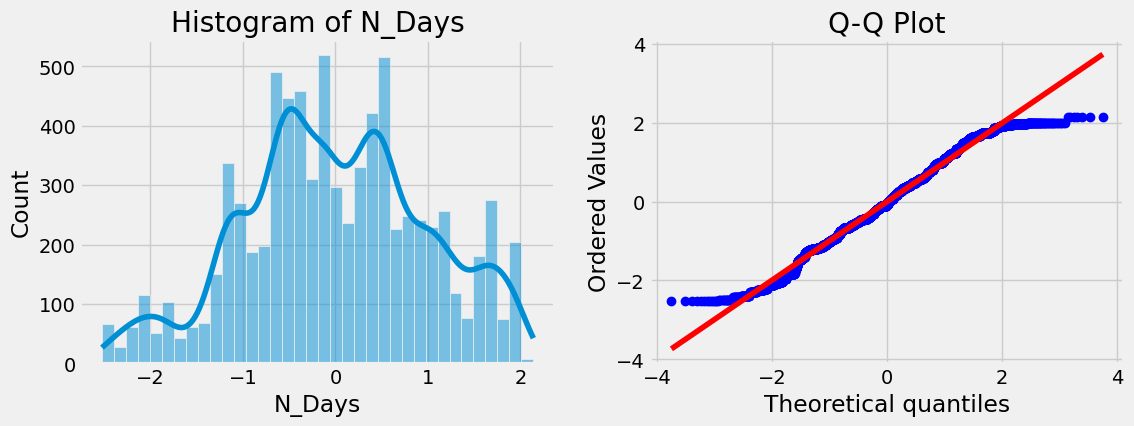

Shapiro-Wilk test statistic: 0.9889706373214722
p-value: 2.4591667841586206e-24
Normality test statistic: 102.70556962611455
p-value: 4.986191170416963e-23


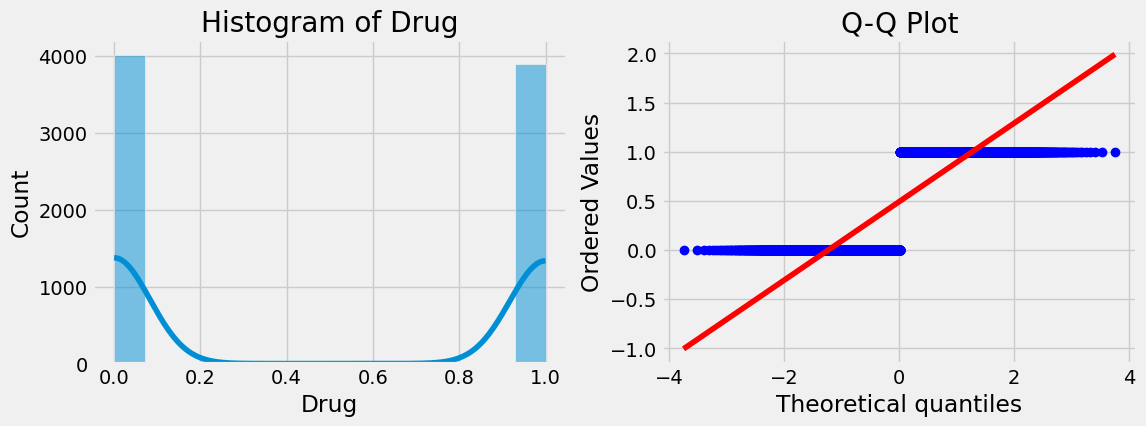

Shapiro-Wilk test statistic: 0.6365453004837036
p-value: 0.0
Normality test statistic: 27280.5227963424
p-value: 0.0


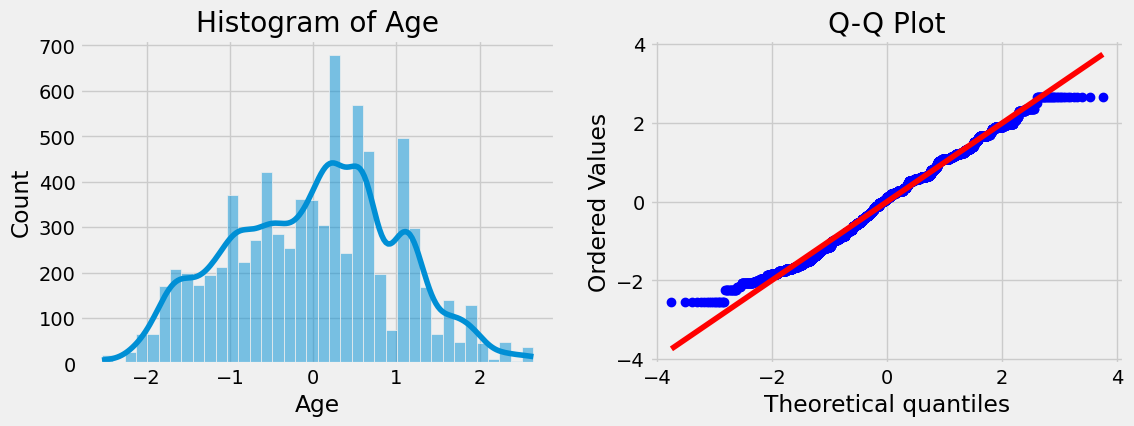

Shapiro-Wilk test statistic: 0.9908571839332581
p-value: 3.542551424810185e-22
Normality test statistic: 187.77086902520568
p-value: 1.6829602563306487e-41


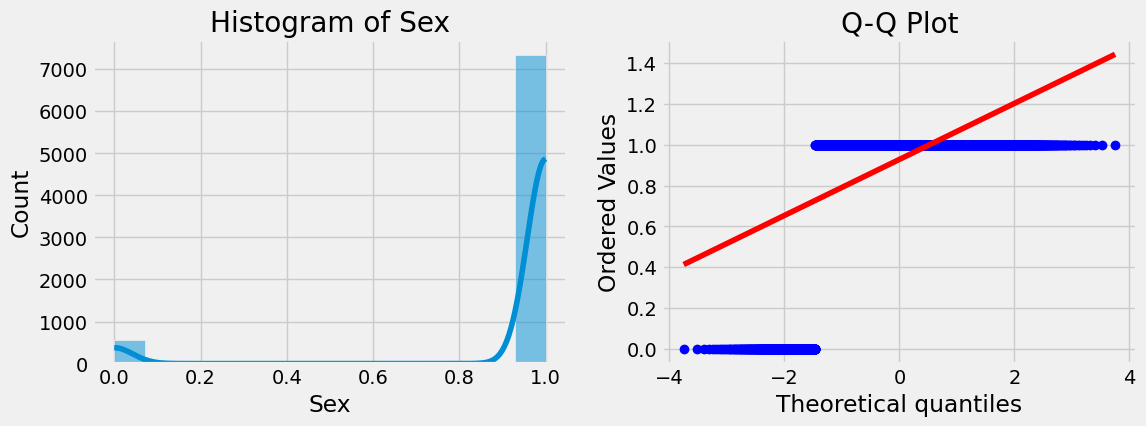

Shapiro-Wilk test statistic: 0.2816411852836609
p-value: 0.0
Normality test statistic: 5216.852597103892
p-value: 0.0


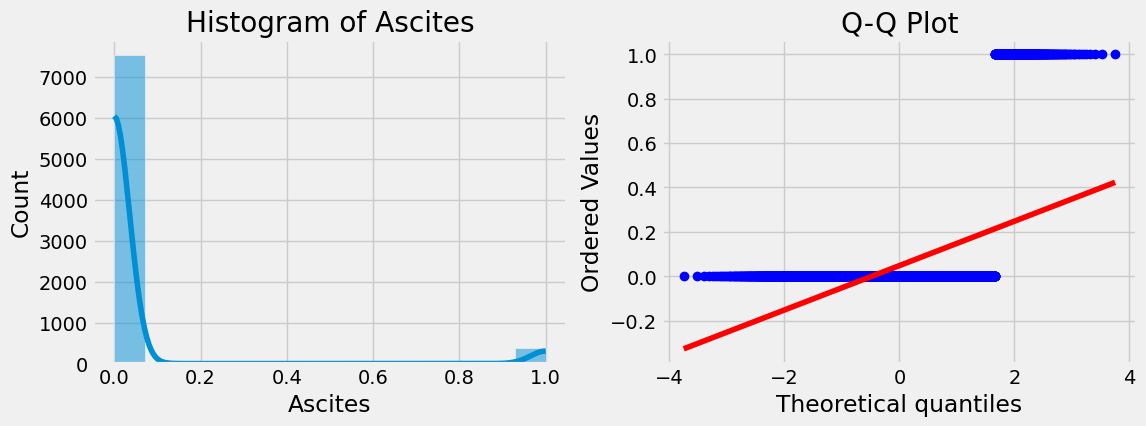

Shapiro-Wilk test statistic: 0.21825814247131348
p-value: 0.0
Normality test statistic: 6601.8170821140375
p-value: 0.0


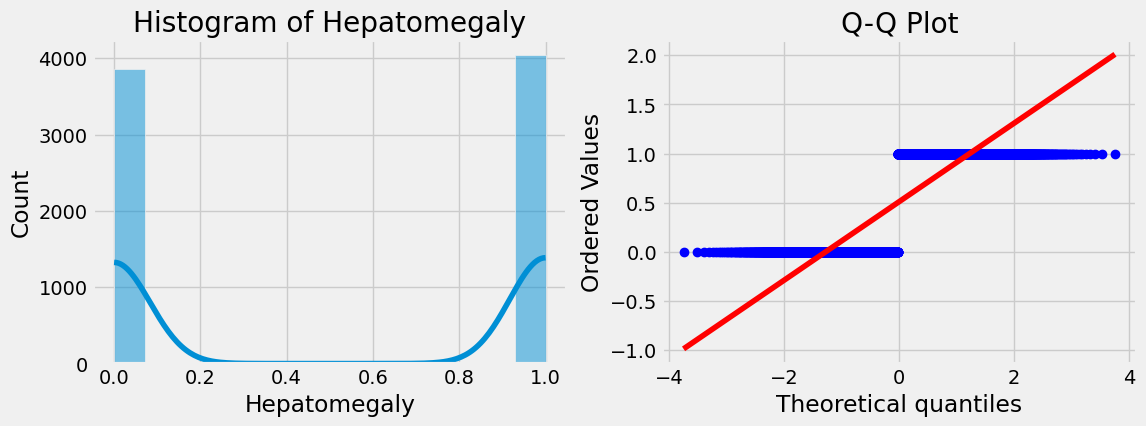

Shapiro-Wilk test statistic: 0.6364789009094238
p-value: 0.0
Normality test statistic: 27300.632693189717
p-value: 0.0


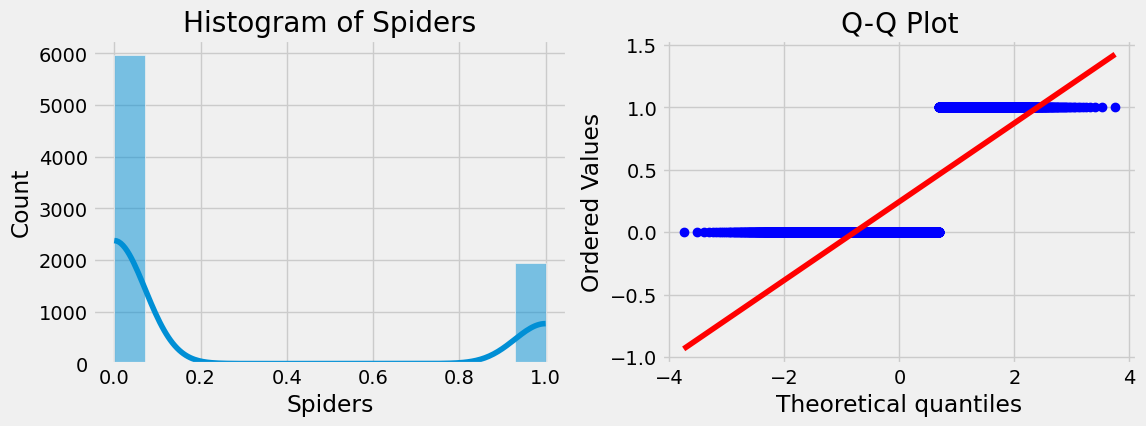

Shapiro-Wilk test statistic: 0.534507155418396
p-value: 0.0
Normality test statistic: 1451.4184426841825
p-value: 0.0


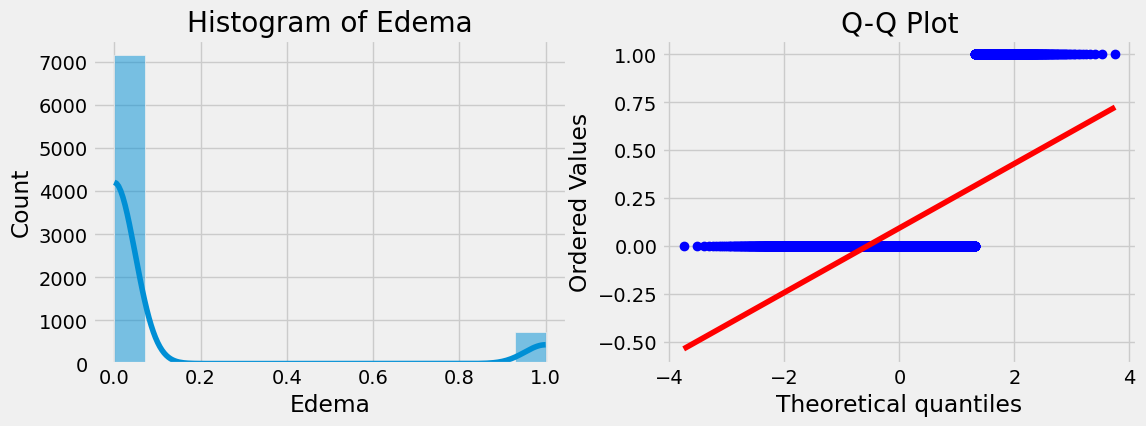

Shapiro-Wilk test statistic: 0.33046257495880127
p-value: 0.0
Normality test statistic: 4280.980757618704
p-value: 0.0


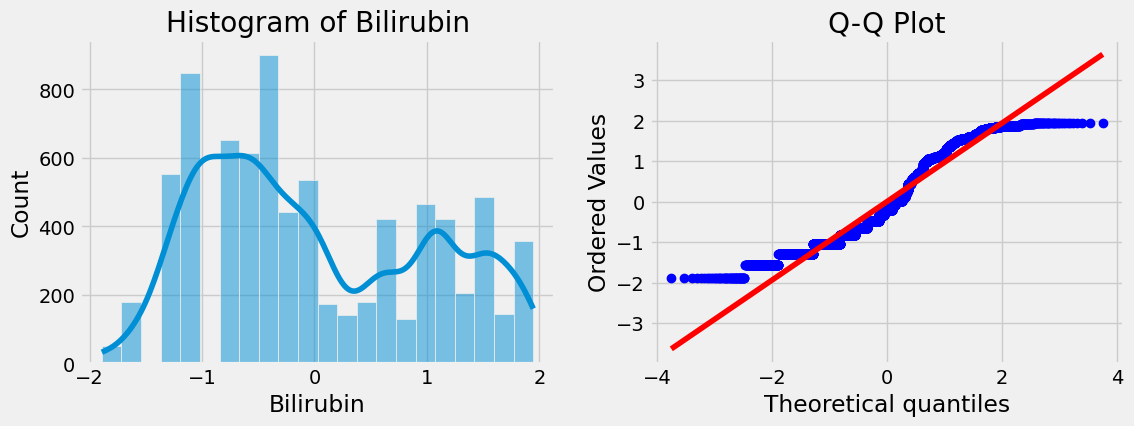

Shapiro-Wilk test statistic: 0.937679648399353
p-value: 0.0
Normality test statistic: 3333.594710935789
p-value: 0.0


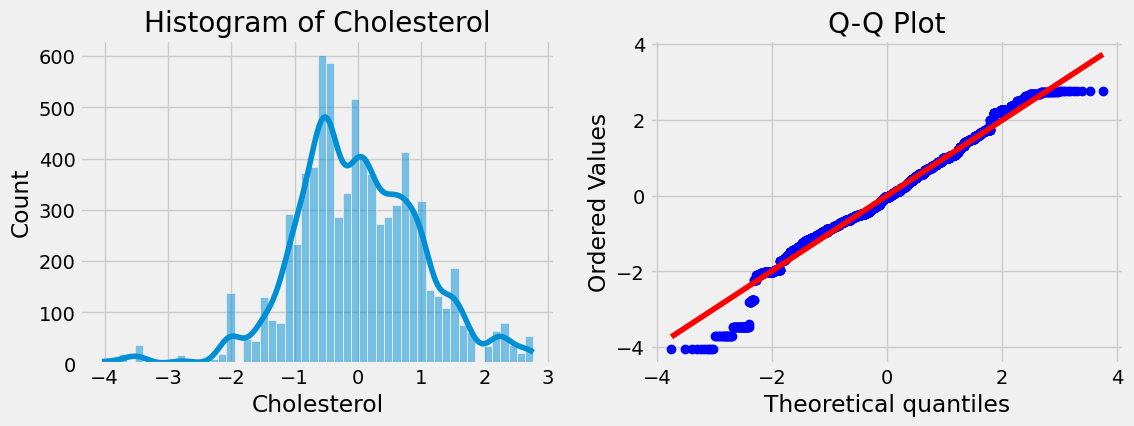

Shapiro-Wilk test statistic: 0.9849495887756348
p-value: 3.7859757513069288e-28
Normality test statistic: 147.02140238323014
p-value: 1.187703706100516e-32


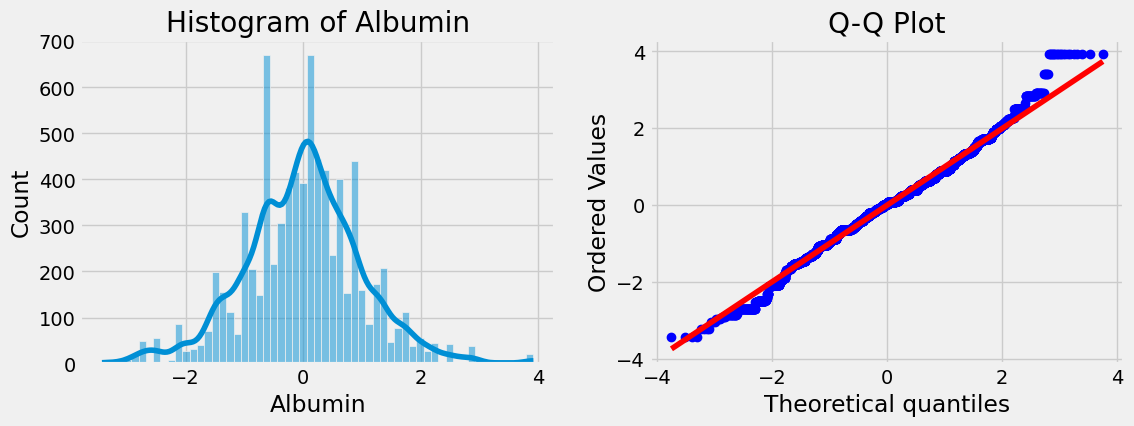

Shapiro-Wilk test statistic: 0.9913102388381958
p-value: 1.3053495716422813e-21
Normality test statistic: 122.51730791872394
p-value: 2.4871651090939163e-27


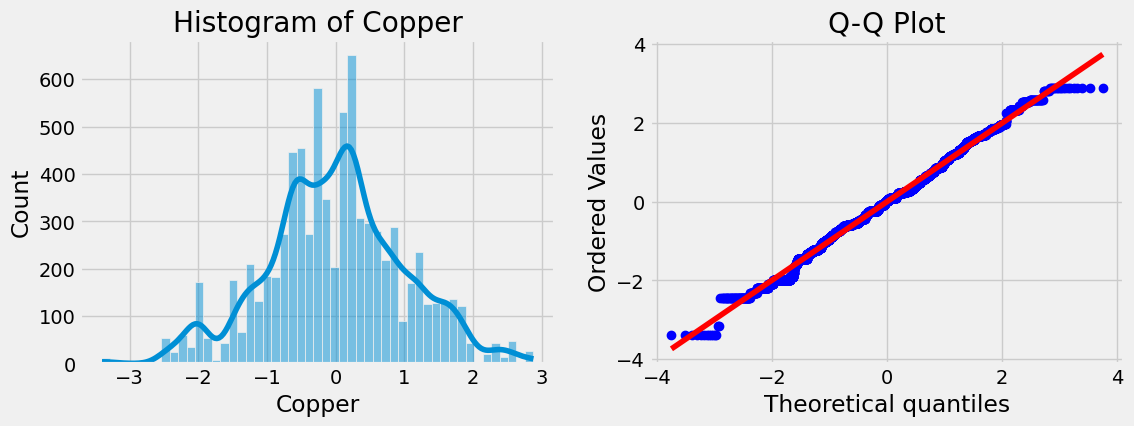

Shapiro-Wilk test statistic: 0.9947148561477661
p-value: 1.750413967231305e-16
Normality test statistic: 6.22497225490187
p-value: 0.04449020940216537


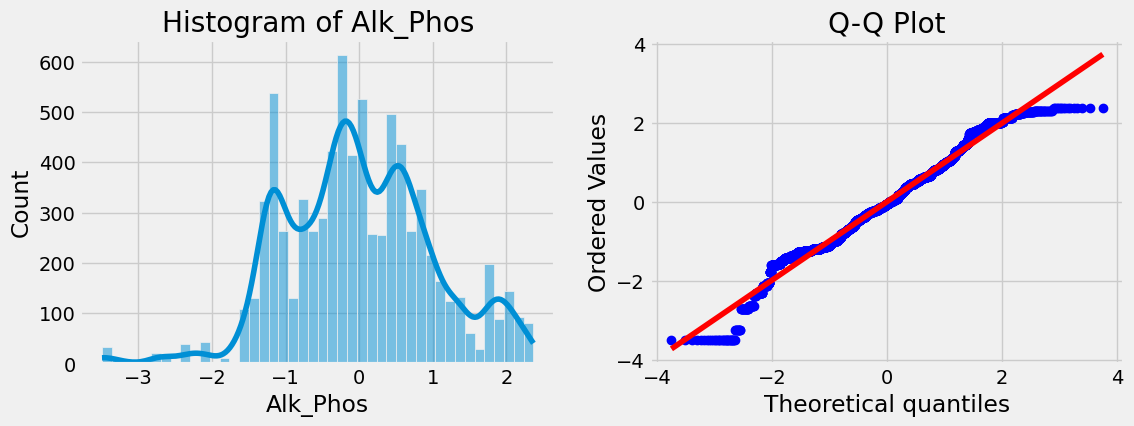

Shapiro-Wilk test statistic: 0.9861706495285034
p-value: 4.4170702532735714e-27
Normality test statistic: 9.91880299612509
p-value: 0.0070171263397624745


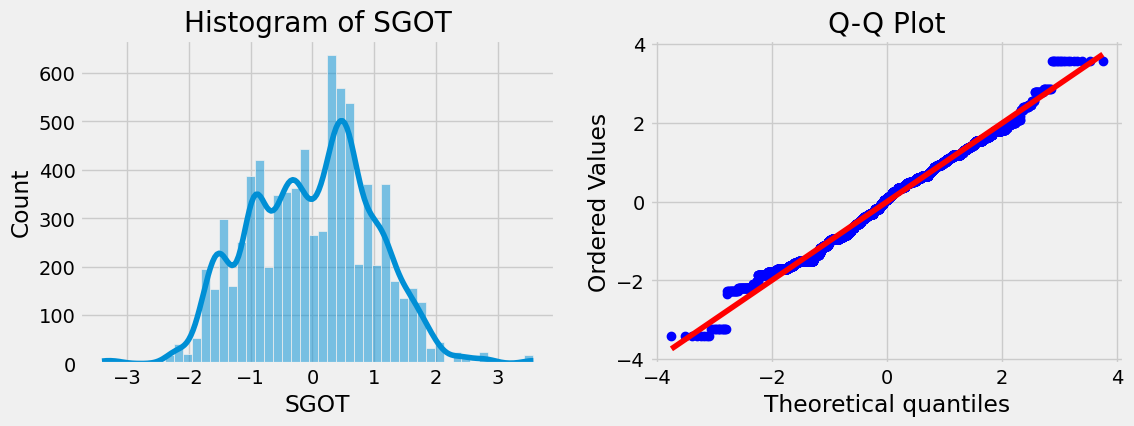

Shapiro-Wilk test statistic: 0.9915159940719604
p-value: 2.399103071029552e-21
Normality test statistic: 13.275759455408375
p-value: 0.001309801437475028


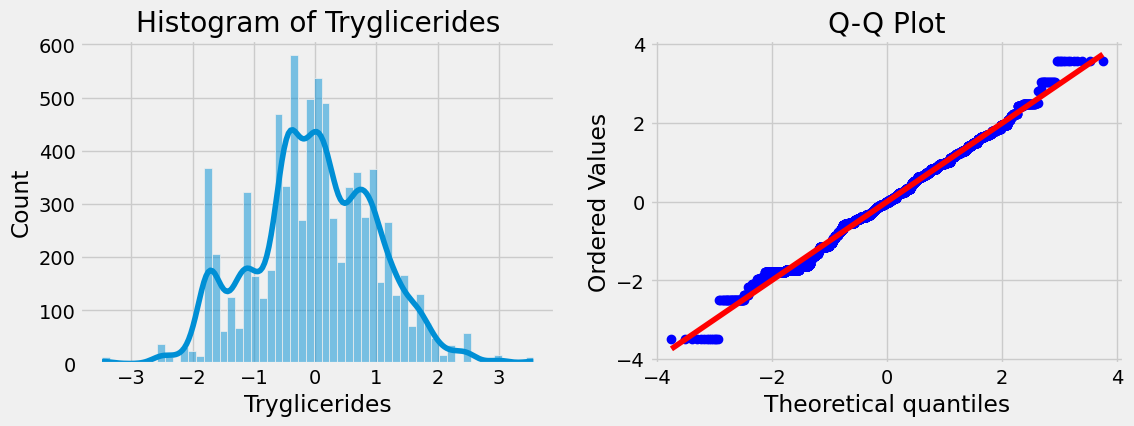

Shapiro-Wilk test statistic: 0.9940446615219116
p-value: 1.2034796315821809e-17
Normality test statistic: 1.2062093108369776
p-value: 0.5471104073053814


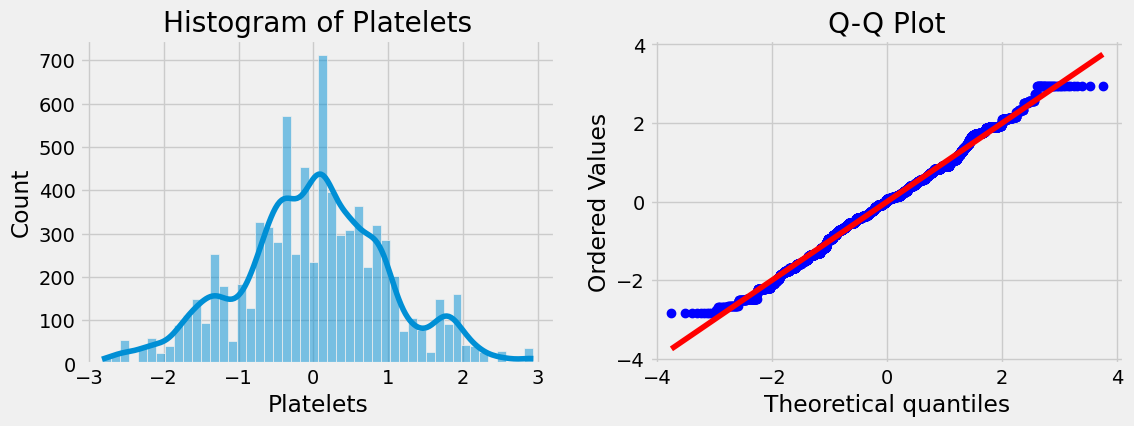

Shapiro-Wilk test statistic: 0.9948493838310242
p-value: 3.0798319132491333e-16
Normality test statistic: 4.30738000139681
p-value: 0.11605512320570191


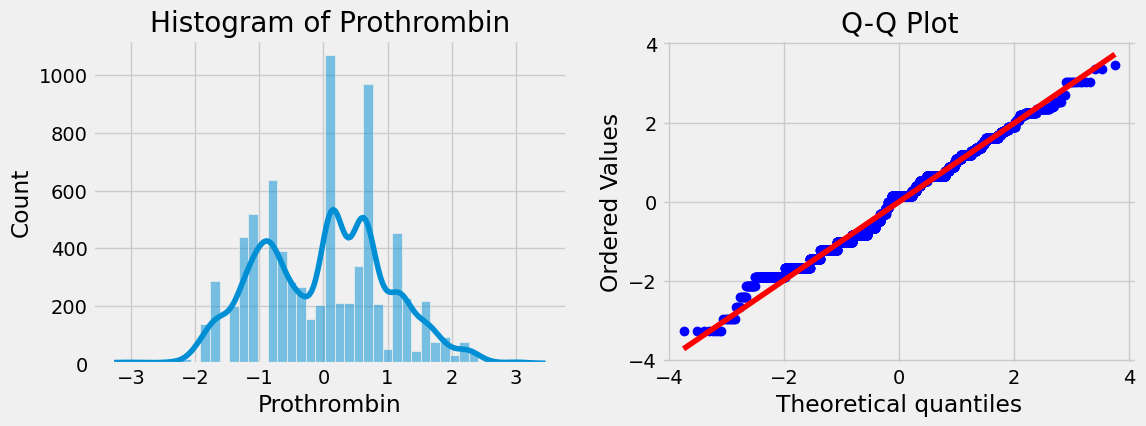

Shapiro-Wilk test statistic: 0.9853891134262085
p-value: 9.002878932694686e-28
Normality test statistic: 112.5170000814581
p-value: 3.6918485110496574e-25


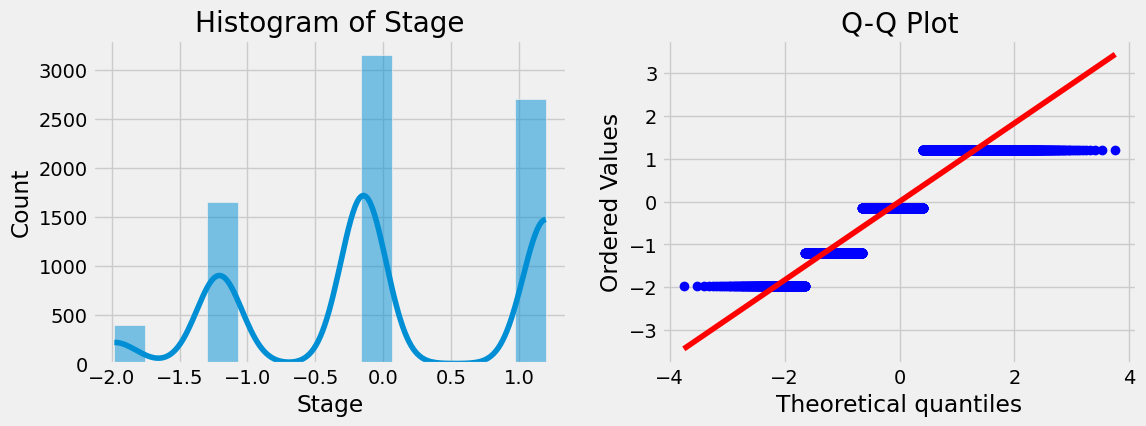

Shapiro-Wilk test statistic: 0.840645432472229
p-value: 0.0
Normality test statistic: 2905.8290014109216
p-value: 0.0


In [15]:
for col in train_df.select_dtypes(np.number).columns:

    data = df[col]

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist='norm', plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    shapiro_test_statistic, shapiro_p_value = shapiro(data)
    print(f'Shapiro-Wilk test statistic: {shapiro_test_statistic}')
    print(f'p-value: {shapiro_p_value}')

    normaltest_statistic, normaltest_p_value = normaltest(data)
    print(f'Normality test statistic: {normaltest_statistic}')
    print(f'p-value: {normaltest_p_value}')

In [16]:
%time
xgb_params = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.3, 0.6, 0.9],
    'random_state': [42],
    'eval_metric': ['mlogloss'],
    'verbosity': [2]
}

CPU times: total: 0 ns
Wall time: 0 ns


In [17]:
%time
inputs = df.drop(['Status'], axis=1)
target =df['Status'].map({"D": 0, "CL": 1, "C": 2})
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
%time  
xgb_model = XGBClassifier()

CPU times: total: 0 ns
Wall time: 0 ns


In [20]:
%time
# grid_search = GridSearchCV(estimator=xgb_model, cv=kf,param_grid= xgb_params,  scoring='neg_log_loss', verbose=0)
# grid_search.fit(inputs, target)


CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%time
mean_score = grid_search.cv_results_['mean_test_score'].mean()
best_params = grid_search.best_params_

print("Mean Log Loss Score: ", mean_score)
print("Best Parameters: ", best_params)
print("Best Negative Log Loss: ", grid_search.best_score_)

In [21]:
%time
lgbm_params = {
    "objective": ["multiclass"],
    'metric': ['multi_logloss'], 
    'boosting_type': ['gbdt'],
    'num_leaves':[ 31, 25, 20],
    'learning_rate': [0.1, 0.05, 0.2],
    'feature_fraction': [0.9, 0.7, 0.5],
    'num_class':[3],
}

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
%time
ligbm_model = LGBMClassifier(random_state=42)

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
%time
grid_search = GridSearchCV(estimator=ligbm_model, param_grid=lgbm_params, cv=kf, scoring='neg_log_loss', verbose=0)
grid_search.fit(inputs, target)

CPU times: total: 0 ns
Wall time: 0 ns
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1932
[LightGBM] [Info] Number of data points in the train set: 6324, number of used features: 18
[LightGBM] [Info] Start training from score -1.101463
[LightGBM] [Info] Start training from score -3.344935
[LightGBM] [Info] Start training from score -0.458308
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(random_state=42),
             param_grid={'boosting_type': ['gbdt'],
                         'feature_fraction': [0.9, 0.7, 0.5],
                         'learning_rate': [0.1, 0.05, 0.2],
                         'metric': ['multi_logloss'], 'num_class': [3],
                         'num_leaves': [31, 25, 20],
                         'objective': ['multiclass']},
             scoring='neg_log_loss')

In [24]:
%time
mean_score = grid_search.cv_results_['mean_test_score'].mean()
best_params = grid_search.best_params_

print("Mean Log Loss Score: ", mean_score)
print("Best Parameters: ", best_params)
print("Best Negative Log Loss: ", grid_search.best_score_)

CPU times: total: 0 ns
Wall time: 0 ns
Mean Log Loss Score:  -0.46476917976448084
Best Parameters:  {'boosting_type': 'gbdt', 'feature_fraction': 0.5, 'learning_rate': 0.05, 'metric': 'multi_logloss', 'num_class': 3, 'num_leaves': 25, 'objective': 'multiclass'}
Best Negative Log Loss:  -0.441024094825313


In [25]:
%time
xgb_params = {'max_depth': 6,
          'min_child_weight': 10,
          'learning_rate': 0.010009541152584345, 
          'n_estimators': 1878, 'subsample': 0.47524425009347593, 
          'colsample_bytree': 0.3292032860985591, 'random_state': 42,

          'tree_method': 'hist', 
        'eval_metric': 'mlogloss', 
          'device' : 'cuda',
        'verbosity': 2}

CPU times: total: 0 ns
Wall time: 0 ns


In [26]:
%time
test_df = pd.read_csv('playground-series-s3e26/test.csv', index_col = [0])
inputs = preprocess(train_df.drop(['Status'], axis=1))
inputs = trf1.fit_transform(inputs)

test_df = trf1.transform(test_df)
test_df = preprocess(test_df)

CPU times: total: 0 ns
Wall time: 0 ns


In [27]:
inputs.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos   
id                                                                             
0  -0.914653  0.863633   0.717416     0.124061 -0.635276  1.316134  0.420889  \
1   0.569410  0.258459  -0.484236     0.503971 -0.095100  0.021285  0.261888   
2   1.218335 -1.277713   1.071075    -0.036707 -0.065494  0.966108 -0.300542   
3   0.571019  0.049453  -1.045297    -0.528404 -0.212338 -0.085619  0.467241   
4  -1.169380 -0.444194  -0.205571     0.372685  0.237154  0.021285 -0.058706   

        SGOT  Tryglicerides  Platelets  Prothrombin     Stage  Drug  Sex   
id                                                                         
0   1.308370      -1.390037   1.411685    -1.446045 -0.145370   NaN  NaN  \
1   0.604105      -0.443003   1.085364     0.649597 -0.145370   NaN  NaN   
2   0.304625      -2.096879  -0.726509     1.359413  1.197711   NaN  NaN   
3  -0.961579      -0.210362   0.107898     0.271867 -0.145370   NaN  NaN   
4   0.428875      -0.210362   0.428291     0.134120  1.197711   NaN  NaN   

    Ascites  Hepatomegaly  Spiders  Edema  
id                                         
0       NaN           NaN      NaN    NaN  
1       NaN           NaN      NaN    NaN  
2       NaN           NaN      NaN    NaN  
3       NaN           NaN      NaN    NaN  
4       NaN           NaN      NaN    NaN

In [28]:
%time
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(inputs, target, random_state=42)
model = XGBClassifier(**xgb_params)
model.fit(inputs, target)
xgb_pred = model.predict_proba(test_df)

CPU times: total: 0 ns
Wall time: 0 ns


In [29]:
%time
lgbm_dict = {'boosting_type': 'gbdt', 'feature_fraction': 0.5, 'learning_rate': 0.05, 'metric': 'multi_logloss', 'num_class': 3, 'num_leaves': 25, 'objective': 'multiclass'}

lbgm_model = LGBMClassifier(**lgbm_dict, random_state=42)


CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
%time
lbgm_model.fit(inputs, target)
lgb_pred = lbgm_model.predict_proba(test_df)

CPU times: total: 0 ns
Wall time: 0 ns
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1934
[LightGBM] [Info] Number of data points in the train set: 7905, number of used features: 12
[LightGBM] [Info] Start training from score -1.087291
[LightGBM] [Info] Start training from score -3.358480
[LightGBM] [Info] Start training from score -0.465082
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


In [31]:
%time
pred = lgb_pred * 0.25 + xgb_pred * 0.75
pred.shape

CPU times: total: 0 ns
Wall time: 0 ns


(5271, 3)

In [32]:
%time
sub_df = pd.read_csv('playground-series-s3e26/sample_submission.csv')

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
%time
sub_df['Status_D'] = pred[:,0]
sub_df['Status_CL'] = pred[:,1]
sub_df['Status_C'] = pred[:, 2]

CPU times: total: 0 ns
Wall time: 0 ns


In [34]:
%time
sub_df.to_csv("prediction.csv", index=False)

CPU times: total: 0 ns
Wall time: 0 ns


In [35]:
%time
orginal_data  = pd.read_csv('playground-series-s3e26/cirrhosis.csv', index_col=[0])

CPU times: total: 0 ns
Wall time: 0 ns


CPU times: total: 0 ns
Wall time: 0 ns


<Axes: ylabel='ID'>

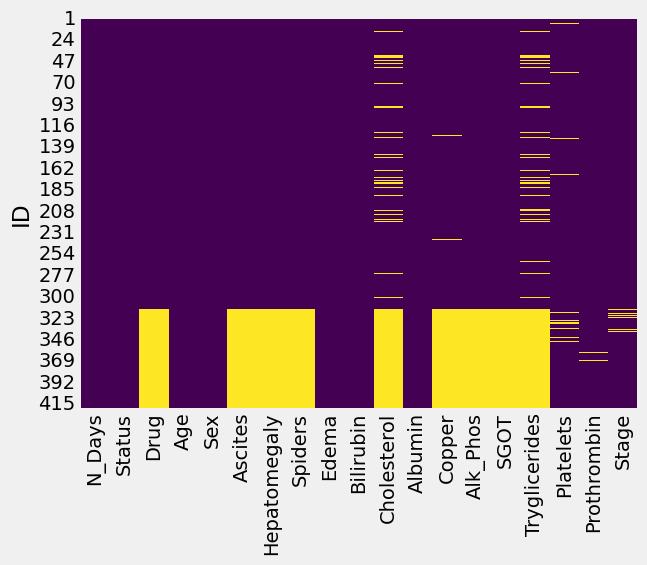

In [36]:
%time
sns.heatmap(orginal_data.isna(), cbar=False, cmap='viridis')

In [37]:
%time
filtered_data = orginal_data[orginal_data.index <= 300]

CPU times: total: 0 ns
Wall time: 0 ns


In [38]:
%time
filtered_data['Cholesterol'] =  orginal_data['Cholesterol'].mean()
filtered_data['Copper'] =  orginal_data['Copper'].mean()
filtered_data['Tryglicerides'] =  orginal_data['Tryglicerides'].mean()
filtered_data['Platelets'] =  orginal_data['Platelets'].mean()

CPU times: total: 0 ns
Wall time: 0 ns


CPU times: total: 0 ns
Wall time: 0 ns


<Axes: ylabel='ID'>

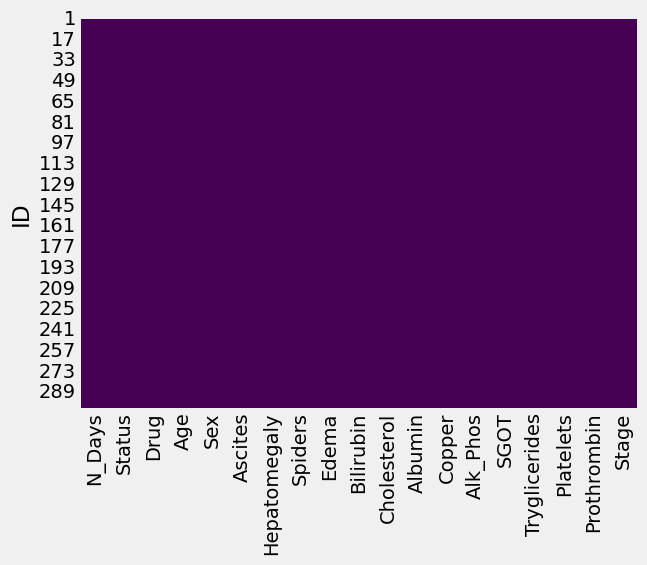

In [39]:
%time
sns.heatmap(filtered_data.isna(), cbar=False, cmap='viridis')

In [40]:
%time
merged_df = pd.concat([train_df, filtered_data], ignore_index=True)

CPU times: total: 0 ns
Wall time: 0 ns


In [41]:
%time
inputs = merged_df.drop(['Status'], axis=1)
target = merged_df['Status']

CPU times: total: 0 ns
Wall time: 0 ns


In [42]:
%time
inputs = preprocess(inputs)
inputs = trf1.fit_transform(inputs)

test_df = trf1.transform(test_df)
test_df = preprocess(test_df)

CPU times: total: 0 ns
Wall time: 0 ns


In [43]:
%time
target =merged_df['Status'].map({"D": 0, "CL": 1, "C": 2})

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
%time
model = XGBClassifier(**xgb_params)
model.fit(inputs, target)
xgb_pred = model.predict_proba(test_df)

CPU times: total: 0 ns
Wall time: 0 ns


In [45]:
%time
lbgm_model = LGBMClassifier(**lgbm_dict, random_state=42)
lbgm_model.fit(inputs, target)
lgb_pred = lbgm_model.predict_proba(test_df)

CPU times: total: 0 ns
Wall time: 0 ns
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1961
[LightGBM] [Info] Number of data points in the train set: 8205, number of used features: 18
[LightGBM] [Info] Start training from score -1.078702
[LightGBM] [Info] Start training from score -3.328919
[LightGBM] [Info] Start training from score -0.471394
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


In [46]:
%time
pred = lgb_pred * 0.25 + xgb_pred * 0.75
pred.shape

CPU times: total: 0 ns
Wall time: 0 ns


(5271, 3)

In [47]:
%time
sub_df['Status_D'] = pred[:,0]
sub_df['Status_CL'] = pred[:,1]
sub_df['Status_C'] = pred[:, 2]

CPU times: total: 0 ns
Wall time: 0 ns


In [48]:
%time
sub_df.to_csv("prediction.csv", index=False)

CPU times: total: 0 ns
Wall time: 0 ns


In [49]:
%time
sub_df.head()

CPU times: total: 0 ns
Wall time: 0 ns


id  Status_C  Status_CL  Status_D
0  7905  0.773087   0.021233   0.20568
1  7906  0.773087   0.021233   0.20568
2  7907  0.811164   0.019165   0.16967
3  7908  0.773087   0.021233   0.20568
4  7909  0.773087   0.021233   0.20568

In [50]:
%time
pred = lgb_pred * 0.25 + xgb_pred * 0.75
pred.shape

CPU times: total: 0 ns
Wall time: 0 ns


(5271, 3)